# Importando módulos utilizados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Carregando o dataset da sigesguarda
- Dados de segurança pública da Guarda Municipal de Curitiba

In [3]:
df_sigesguarda_completo = pd.read_csv('..\\Datasets\\sigesguarda.csv', sep = ';', encoding='latin-1')

C:\Users\User\AppData\Local\Temp\ipykernel_20284\3794231085.py:1: DtypeWarning: Columns (0,6,8,10,12,14,15,19,20,21,22,26,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sigesguarda_completo = pd.read_csv('..\\Datasets\\sigesguarda.csv', sep = ';', encoding='latin-1')


# Carregando o dataset de população, estimada por ano, de Curitiba

In [4]:
df_populacao_estimada_cwb = pd.read_excel('..\\Datasets\\populacao_estimada_curitiba.xlsx')

# Visualização geral do conteúdo

## Visualizações iniciais dos dados

In [5]:
df_sigesguarda_completo.head()

,ATENDIMENTO_ANO,ATENDIMENTO_BAIRRO_NOME,EQUIPAMENTO_URBANO_NOME,FLAG_EQUIPAMENTO_URBANO,FLAG_FLAGRANTE,LOGRADOURO_NOME,NATUREZA1_DEFESA_CIVIL,NATUREZA1_DESCRICAO,NATUREZA2_DEFESA_CIVIL,NATUREZA2_DESCRICAO,...,OCORRENCIA_HORA,OCORRENCIA_MES,OPERACAO_DESCRICAO,ORIGEM_CHAMADO_DESCRICAO,REGIONAL_FATO_NOME,SECRETARIA_NOME,SECRETARIA_SIGLA,SERVICO_NOME,SITUACAO_EQUIPE_DESCRICAO,NUMERO_PROTOCOLO_156
0,---------------,-----------------------,----------------------------------------------...,-----------------------,--------------,----------------------------------------------...,----------------------,----------------------------------------------...,----------------------,----------------------------------------------...,...,---------------,--------------,----------------------------------------------...,----------------------------------------------...,--------------------,----------------------------------------------...,----------------,----------------------------------------------...,----------------------------------------------...,--------------------
1,2009,CIDADE INDUSTRIAL,NaN,NÃO,NÃO,DAVI XAVIER DA SILVA,0,Alarmes,NaN,NaN,...,15:14:00,1,NaN,.,CIC,FUNDAÇÃO DE AÇÃO SOCIAL,FAS,SIGA,NaN,NaN
2,2009,FAZENDINHA,BOSQUE DA FAZENDINHA,SIM,NÃO,CARLOS KLEMTZ,0,Roubo,NaN,NaN,...,15:22:00,1,NaN,153,PORTÃO,SECRETARIA MUNICIPAL MEIO AMBIENTE,SMMA,NORMAL,NaN,NaN
3,2009,UBERABA,NaN,NÃO,NÃO,DOUTOR JOÃO DE PAULA MOURA BRITO,0,Animais,NaN,NaN,...,15:59:00,1,NaN,156,CAJURU,SECRETARIA MUNICIPAL DA SAÚDE,SMS,SACAF,NaN,2640856
4,2009,SÍTIO CERCADO,NaN,NÃO,NÃO,EDGARD CAVALCANTI DE ALBUQUERQUE,0,Animais,NaN,NaN,...,16:13:00,1,NaN,156,BAIRRO NOVO,SECRETARIA MUNICIPAL DA SAÚDE,SMS,SACAF,NaN,2640854


In [6]:
df_sigesguarda_completo.tail()

,ATENDIMENTO_ANO,ATENDIMENTO_BAIRRO_NOME,EQUIPAMENTO_URBANO_NOME,FLAG_EQUIPAMENTO_URBANO,FLAG_FLAGRANTE,LOGRADOURO_NOME,NATUREZA1_DEFESA_CIVIL,NATUREZA1_DESCRICAO,NATUREZA2_DEFESA_CIVIL,NATUREZA2_DESCRICAO,...,OCORRENCIA_HORA,OCORRENCIA_MES,OPERACAO_DESCRICAO,ORIGEM_CHAMADO_DESCRICAO,REGIONAL_FATO_NOME,SECRETARIA_NOME,SECRETARIA_SIGLA,SERVICO_NOME,SITUACAO_EQUIPE_DESCRICAO,NUMERO_PROTOCOLO_156
429342,2022,PORTÃO,TERMINAL PORTÃO,SIM,NÃO,REPÚBLICA ARGENTINA,0,Ameaça,NaN,NaN,...,06:09:00,12,NORMAL,153,PORTÃO,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,SMDT,NORMAL,Solicitação,NaN
429343,2022,SÍTIO CERCADO,ESTAÇÃO TUBO ARROIO CERCADO 1,SIM,NÃO,RICARDO GASPARIAN MACHADO,0,Roubo,NaN,NaN,...,06:26:00,12,NORMAL,153,BAIRRO NOVO,URBANIZAÇÃO DE CURITIBA,URBS,NORMAL,Solicitação,NaN
429344,2022,JARDIM BOTÂNICO,NaN,NÃO,NÃO,SETE DE SETEMBRO,0,Apoio,NaN,NaN,...,06:28:00,12,NORMAL,153,MATRIZ,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,SMDT,NORMAL,Solicitação,NaN
429345,2022,JARDIM BOTÂNICO,NaN,NÃO,NÃO,SETE DE SETEMBRO,0,Avaria em Equipamento/Patrimônio (não intencio...,NaN,NaN,...,06:35:00,12,NORMAL,IMEDIATA,MATRIZ,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,SMDT,GPEO,Deslocamento,NaN
429346,2022,XAXIM,ESTAÇÃO TUBO SANTA BERNADETHE 1,SIM,NÃO,BR-476,0,Importunação sexual,NaN,NaN,...,07:21:00,12,NORMAL,153,BOQUEIRÃO,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,SMDT,NORMAL,Solicitação,NaN


## Analisando colunas para identificar colunas relevantes

Todas as colunas presentes

In [7]:
df_sigesguarda_completo.columns

Index(['ATENDIMENTO_ANO', 'ATENDIMENTO_BAIRRO_NOME', 'EQUIPAMENTO_URBANO_NOME',
       'FLAG_EQUIPAMENTO_URBANO', 'FLAG_FLAGRANTE', 'LOGRADOURO_NOME',
       'NATUREZA1_DEFESA_CIVIL', 'NATUREZA1_DESCRICAO',
       'NATUREZA2_DEFESA_CIVIL', 'NATUREZA2_DESCRICAO',
       'NATUREZA3_DEFESA_CIVIL', 'NATUREZA3_DESCRICAO',
       'NATUREZA4_DEFESA_CIVIL', 'NATUREZA4_DESCRICAO',
       'NATUREZA5_DEFESA_CIVIL', 'NATUREZA5_DESCRICAO',
       'SUBCATEGORIA1_DESCRICAO', 'SUBCATEGORIA2_DESCRICAO',
       'SUBCATEGORIA3_DESCRICAO', 'SUBCATEGORIA4_DESCRICAO',
       'SUBCATEGORIA5_DESCRICAO', 'OCORRENCIA_ANO', 'OCORRENCIA_CODIGO',
       'OCORRENCIA_DATA', 'OCORRENCIA_DIA_SEMANA', 'OCORRENCIA_HORA',
       'OCORRENCIA_MES', 'OPERACAO_DESCRICAO', 'ORIGEM_CHAMADO_DESCRICAO',
       'REGIONAL_FATO_NOME', 'SECRETARIA_NOME', 'SECRETARIA_SIGLA',
       'SERVICO_NOME', 'SITUACAO_EQUIPE_DESCRICAO', 'NUMERO_PROTOCOLO_156'],
      dtype='object')

Visão geral para cada coluna

In [8]:
df_desc_sigesguarda = df_sigesguarda_completo.describe()
for coluna in df_desc_sigesguarda.columns:
    print(f"{df_desc_sigesguarda[coluna]}\n")

count     429328.0
unique        16.0
top         2021.0
freq       58726.0
Name: ATENDIMENTO_ANO, dtype: float64

count     429202
unique       193
top       CENTRO
freq       73559
Name: ATENDIMENTO_BAIRRO_NOME, dtype: object

count             152087
unique              3786
top       PARQUE BARIGUI
freq                4362
Name: EQUIPAMENTO_URBANO_NOME, dtype: object

count     429347
unique         3
top          NÃO
freq      277260
Name: FLAG_EQUIPAMENTO_URBANO, dtype: object

count     429347
unique         3
top          NÃO
freq      410150
Name: FLAG_FLAGRANTE, dtype: object

count                        429347
unique                        19121
top       MARECHAL FLORIANO PEIXOTO
freq                           7723
Name: LOGRADOURO_NOME, dtype: object

count     429347
unique         5
top            0
freq      401996
Name: NATUREZA1_DEFESA_CIVIL, dtype: int64

count     429347
unique       189
top        Apoio
freq       69920
Name: NATUREZA1_DESCRICAO, dtype: object

co

Contagem de valores únicos para cada coluna

In [9]:
for coluna in df_sigesguarda_completo.columns:
    print(f"{str(coluna).upper()}")
    print(f"{df_sigesguarda_completo[coluna].value_counts()}\n")

ATENDIMENTO_ANO
ATENDIMENTO_ANO
2021.0             58726
2020               57457
2022               47613
2019               33754
2015.0             25566
2014.0             25292
2013               24468
2018               24155
2010               22531
2017.0             22133
2011               21481
2016               21470
2012               19778
2009               16383
2009                8520
---------------        1
Name: count, dtype: int64

ATENDIMENTO_BAIRRO_NOME
ATENDIMENTO_BAIRRO_NOME
CENTRO                 73559
CIDADE INDUSTRIAL      29617
SÍTIO CERCADO          26284
CAJURU                 19772
BOQUEIRÃO              19338
                       ...  
SITIO DAS PALMEIRAS        1
JARDIM WEISSOPOLIS         1
SANTA TERESINHA            1
SÃO JORGE                  1
VILA IPANEMA               1
Name: count, Length: 193, dtype: int64

EQUIPAMENTO_URBANO_NOME
EQUIPAMENTO_URBANO_NOME
PARQUE BARIGUI                                                        4362
TERMINAL PI

FLAG_EQUIPAMENTO_URBANO
NÃO                        277260
SIM                        152086
-----------------------         1
Name: count, dtype: int64

FLAG_FLAGRANTE
FLAG_FLAGRANTE
NÃO               410150
SIM                19196
--------------         1
Name: count, dtype: int64

LOGRADOURO_NOME
LOGRADOURO_NOME
MARECHAL FLORIANO PEIXOTO        7723
RUI BARBOSA                      6158
REPÚBLICA ARGENTINA              6074
PARANÁ                           5687
TIRADENTES                       4915
                                 ... 
arthur pina                         1
professor joão agemiro loyola       1
alba bertoldi                       1
butiazinho                          1
General  Teodorico Guimarães        1
Name: count, Length: 19121, dtype: int64

NATUREZA1_DEFESA_CIVIL
NATUREZA1_DEFESA_CIVIL
0                         401996
0                          15975
1                          10967
1                            408
----------------------         1
Name: count,

# Tratamento dos dados

## Obtendo colunas de interesse

In [10]:
df_siges_interesse = df_sigesguarda_completo[
    [
        # Momento da ocorrência
        'OCORRENCIA_ANO',
        'OCORRENCIA_DATA',
        'OCORRENCIA_DIA_SEMANA',
        'OCORRENCIA_HORA',
        'OCORRENCIA_MES',
        # Localidade da ocorrência
        'ATENDIMENTO_BAIRRO_NOME',
        'EQUIPAMENTO_URBANO_NOME', # REMETE A ALGO COMO SE FOSSE UM PONTO DE REFERÊNCIA
        # 'FLAG_EQUIPAMENTO_URBANO', # FLAG QUE INDICA SE HÁ UM PONTO DE REFERÊNCIA ASSOCIADO
        'LOGRADOURO_NOME',
        # Natureza da ocorrência
        'NATUREZA1_DESCRICAO',
        'NATUREZA2_DESCRICAO',
        'SUBCATEGORIA1_DESCRICAO',
        'SUBCATEGORIA2_DESCRICAO',
        # 'FLAG_FLAGRANTE',
        # Órgão atuador
        'OPERACAO_DESCRICAO',
        'ORIGEM_CHAMADO_DESCRICAO',
        'SECRETARIA_NOME',
        'SERVICO_NOME',
        'SITUACAO_EQUIPE_DESCRICAO'
        ]
]
df_siges_interesse

,OCORRENCIA_ANO,OCORRENCIA_DATA,OCORRENCIA_DIA_SEMANA,OCORRENCIA_HORA,OCORRENCIA_MES,ATENDIMENTO_BAIRRO_NOME,EQUIPAMENTO_URBANO_NOME,LOGRADOURO_NOME,NATUREZA1_DESCRICAO,NATUREZA2_DESCRICAO,SUBCATEGORIA1_DESCRICAO,SUBCATEGORIA2_DESCRICAO,OPERACAO_DESCRICAO,ORIGEM_CHAMADO_DESCRICAO,SECRETARIA_NOME,SERVICO_NOME,SITUACAO_EQUIPE_DESCRICAO
0,--------------,-----------------------,---------------------,---------------,--------------,-----------------------,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...
1,2009,2009-01-01 15:14:00.000,QUINTA,15:14:00,1,CIDADE INDUSTRIAL,NaN,DAVI XAVIER DA SILVA,Alarmes,NaN,Disparo de Alarme (violação),NaN,NaN,.,FUNDAÇÃO DE AÇÃO SOCIAL,SIGA,NaN
2,2009,2009-01-01 15:22:00.000,QUINTA,15:22:00,1,FAZENDINHA,BOSQUE DA FAZENDINHA,CARLOS KLEMTZ,Roubo,NaN,Transeunte,NaN,NaN,153,SECRETARIA MUNICIPAL MEIO AMBIENTE,NORMAL,NaN
3,2009,2009-01-01 15:59:00.000,QUINTA,15:59:00,1,UBERABA,NaN,DOUTOR JOÃO DE PAULA MOURA BRITO,Animais,NaN,Cão solto em via pública,NaN,NaN,156,SECRETARIA MUNICIPAL DA SAÚDE,SACAF,NaN
4,2009,2009-01-01 16:13:00.000,QUINTA,16:13:00,1,SÍTIO CERCADO,NaN,EDGARD CAVALCANTI DE ALBUQUERQUE,Animais,NaN,Cão solto em via pública,NaN,NaN,156,SECRETARIA MUNICIPAL DA SAÚDE,SACAF,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429342,2022,2022-12-12 06:09:00.000,SEGUNDA,06:09:00,12,PORTÃO,TERMINAL PORTÃO,REPÚBLICA ARGENTINA,Ameaça,NaN,NaN,NaN,NORMAL,153,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,NORMAL,Solicitação
429343,2022,2022-12-12 06:26:00.000,SEGUNDA,06:26:00,12,SÍTIO CERCADO,ESTAÇÃO TUBO ARROIO CERCADO 1,RICARDO GASPARIAN MACHADO,Roubo,NaN,Transporte Coletivo,NaN,NORMAL,153,URBANIZAÇÃO DE CURITIBA,NORMAL,Solicitação
429344,2022,2022-12-12 06:28:00.000,SEGUNDA,06:28:00,12,JARDIM BOTÂNICO,NaN,SETE DE SETEMBRO,Apoio,NaN,Apoio ao GM,NaN,NORMAL,153,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,NORMAL,Solicitação
429345,2022,2022-12-12 06:35:00.000,SEGUNDA,06:35:00,12,JARDIM BOTÂNICO,NaN,SETE DE SETEMBRO,Avaria em Equipamento/Patrimônio (não intencio...,NaN,NaN,NaN,NORMAL,IMEDIATA,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,GPEO,Deslocamento


Removendo linha de index 0 com '--------' nos valores

In [11]:
df_siges_interesse = df_siges_interesse.drop(index = 0, axis = 0).reset_index(drop = True)
df_siges_interesse

,OCORRENCIA_ANO,OCORRENCIA_DATA,OCORRENCIA_DIA_SEMANA,OCORRENCIA_HORA,OCORRENCIA_MES,ATENDIMENTO_BAIRRO_NOME,EQUIPAMENTO_URBANO_NOME,LOGRADOURO_NOME,NATUREZA1_DESCRICAO,NATUREZA2_DESCRICAO,SUBCATEGORIA1_DESCRICAO,SUBCATEGORIA2_DESCRICAO,OPERACAO_DESCRICAO,ORIGEM_CHAMADO_DESCRICAO,SECRETARIA_NOME,SERVICO_NOME,SITUACAO_EQUIPE_DESCRICAO
0,2009,2009-01-01 15:14:00.000,QUINTA,15:14:00,1,CIDADE INDUSTRIAL,NaN,DAVI XAVIER DA SILVA,Alarmes,NaN,Disparo de Alarme (violação),NaN,NaN,.,FUNDAÇÃO DE AÇÃO SOCIAL,SIGA,NaN
1,2009,2009-01-01 15:22:00.000,QUINTA,15:22:00,1,FAZENDINHA,BOSQUE DA FAZENDINHA,CARLOS KLEMTZ,Roubo,NaN,Transeunte,NaN,NaN,153,SECRETARIA MUNICIPAL MEIO AMBIENTE,NORMAL,NaN
2,2009,2009-01-01 15:59:00.000,QUINTA,15:59:00,1,UBERABA,NaN,DOUTOR JOÃO DE PAULA MOURA BRITO,Animais,NaN,Cão solto em via pública,NaN,NaN,156,SECRETARIA MUNICIPAL DA SAÚDE,SACAF,NaN
3,2009,2009-01-01 16:13:00.000,QUINTA,16:13:00,1,SÍTIO CERCADO,NaN,EDGARD CAVALCANTI DE ALBUQUERQUE,Animais,NaN,Cão solto em via pública,NaN,NaN,156,SECRETARIA MUNICIPAL DA SAÚDE,SACAF,NaN
4,2009,2009-01-01 16:29:00.000,QUINTA,16:29:00,1,TATUQUARA,CENTRO DE ESPORTE E LAZER SANTA RITA,CARLOS MUNHOZ DA ROCHA,Alarmes,NaN,Disparo de Alarme (violação),NaN,NaN,.,FUNDAÇÃO DE AÇÃO SOCIAL,SIGA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429341,2022,2022-12-12 06:09:00.000,SEGUNDA,06:09:00,12,PORTÃO,TERMINAL PORTÃO,REPÚBLICA ARGENTINA,Ameaça,NaN,NaN,NaN,NORMAL,153,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,NORMAL,Solicitação
429342,2022,2022-12-12 06:26:00.000,SEGUNDA,06:26:00,12,SÍTIO CERCADO,ESTAÇÃO TUBO ARROIO CERCADO 1,RICARDO GASPARIAN MACHADO,Roubo,NaN,Transporte Coletivo,NaN,NORMAL,153,URBANIZAÇÃO DE CURITIBA,NORMAL,Solicitação
429343,2022,2022-12-12 06:28:00.000,SEGUNDA,06:28:00,12,JARDIM BOTÂNICO,NaN,SETE DE SETEMBRO,Apoio,NaN,Apoio ao GM,NaN,NORMAL,153,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,NORMAL,Solicitação
429344,2022,2022-12-12 06:35:00.000,SEGUNDA,06:35:00,12,JARDIM BOTÂNICO,NaN,SETE DE SETEMBRO,Avaria em Equipamento/Patrimônio (não intencio...,NaN,NaN,NaN,NORMAL,IMEDIATA,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,GPEO,Deslocamento


## Tratamento dos dados por coluna

### OCORRENCIA_ANO

In [12]:
df_siges_interesse['OCORRENCIA_ANO'] = df_siges_interesse['OCORRENCIA_ANO'].astype(int).astype(int)
print(f"{sum(df_siges_interesse['OCORRENCIA_ANO'].value_counts())}\n{df_siges_interesse['OCORRENCIA_ANO'].value_counts()}")

429346
OCORRENCIA_ANO
2021    58731
2020    57453
2022    47608
2019    33762
2015    25566
2014    25303
2009    24903
2013    24470
2018    24153
2010    22531
2017    22137
2011    21484
2016    21469
2012    19776
Name: count, dtype: int64


### OCORRENCIA_DATA

In [13]:
df_siges_interesse['OCORRENCIA_DATA'] = pd.to_datetime(df_siges_interesse['OCORRENCIA_DATA'])
print(f"{sum(df_siges_interesse['OCORRENCIA_DATA'].value_counts())}\n{df_siges_interesse['OCORRENCIA_DATA'].value_counts()}")

429346
OCORRENCIA_DATA
2022-12-09 19:00:00    34
2009-01-02 16:51:00    31
2011-06-09 00:00:00    28
2013-10-21 22:00:00    27
2009-01-21 14:00:00    23
                       ..
2015-03-19 21:25:00     1
2015-03-19 21:06:00     1
2015-03-19 20:45:00     1
2015-03-19 20:39:00     1
2022-12-12 07:21:00     1
Name: count, Length: 392825, dtype: int64


### OCORRENCIA_DIA_SEMANA

In [14]:
df_siges_interesse['OCORRENCIA_DIA_SEMANA'] = df_siges_interesse['OCORRENCIA_DIA_SEMANA'].str.upper()
print(f"{sum(df_siges_interesse['OCORRENCIA_DIA_SEMANA'].value_counts())}\n{df_siges_interesse['OCORRENCIA_DIA_SEMANA'].value_counts()}")

429346
OCORRENCIA_DIA_SEMANA
SÁBADO     69202
DOMINGO    65919
SEXTA      63172
QUINTA     61020
QUARTA     58610
TERÇA      56578
SEGUNDA    54845
Name: count, dtype: int64


### OCORRENCIA_MES

In [15]:
df_siges_interesse['OCORRENCIA_MES'] = df_siges_interesse['OCORRENCIA_MES'].astype(int)
print(f"{sum(df_siges_interesse['OCORRENCIA_MES'].value_counts())}\n{df_siges_interesse['OCORRENCIA_MES'].value_counts()}")

429346
OCORRENCIA_MES
3     38840
5     37766
7     37295
8     37167
10    36486
9     36078
4     36016
6     35361
1     34801
11    34035
12    33112
2     32389
Name: count, dtype: int64


### ATENDIMENTO_BAIRRO_NOME

In [16]:
df_siges_interesse['ATENDIMENTO_BAIRRO_NOME'] = df_siges_interesse['ATENDIMENTO_BAIRRO_NOME'].str.upper()
print(f"{sum(df_siges_interesse['ATENDIMENTO_BAIRRO_NOME'].value_counts())}\n{df_siges_interesse['ATENDIMENTO_BAIRRO_NOME'].value_counts()}")
# df_siges_interesse = df_siges_interesse.dropna(axis=0, subset='ATENDIMENTO_BAIRRO_NOME').reset_index(drop = True)

429201
ATENDIMENTO_BAIRRO_NOME
CENTRO                 73559
CIDADE INDUSTRIAL      29617
SÍTIO CERCADO          26284
CAJURU                 19772
BOQUEIRÃO              19338
                       ...  
SITIO DAS PALMEIRAS        1
JARDIM WEISSOPOLIS         1
SANTA TERESINHA            1
SÃO JORGE                  1
VILA IPANEMA               1
Name: count, Length: 191, dtype: int64


### EQUIPAMENTO_URBANO_NOME

In [17]:
df_siges_interesse['EQUIPAMENTO_URBANO_NOME'] = df_siges_interesse['EQUIPAMENTO_URBANO_NOME'].str.upper()
print(f"{sum(df_siges_interesse['EQUIPAMENTO_URBANO_NOME'].value_counts())}\n{df_siges_interesse['EQUIPAMENTO_URBANO_NOME'].value_counts()}")

152086
EQUIPAMENTO_URBANO_NOME
PARQUE BARIGUI                                       4362
TERMINAL PINHEIRINHO                                 2092
TERMINAL PORTÃO                                      1672
ESTAÇÃO TUBO PÇ. RUI BARBOSA                         1651
PARQUE TANGUÁ                                        1593
                                                     ... 
CÂMBIO VERDE VILA TORRES - AQUELINO                     1
INSTITUTO FEDERAL DO PARANÁ                             1
ESCOLA ESTADUAL PROFESSORA MARIA HELOISA CASSELLI       1
RESTAURANTE                                             1
HOTEL NIKKO                                             1
Name: count, Length: 3776, dtype: int64


### LOGRADOURO_NOME

In [18]:
print(f"{sum(df_siges_interesse['LOGRADOURO_NOME'].value_counts())}\n{df_siges_interesse['LOGRADOURO_NOME'].value_counts()}")
df_siges_interesse['LOGRADOURO_NOME'] = df_siges_interesse['LOGRADOURO_NOME'].str.upper()

429346
LOGRADOURO_NOME
MARECHAL FLORIANO PEIXOTO       7723
RUI BARBOSA                     6158
REPÚBLICA ARGENTINA             6074
PARANÁ                          5687
TIRADENTES                      4915
                                ... 
NSA DE CARAVAGGIO                  1
virgilio gomes cruzara             1
eduardo baena                      1
EVALDO MECKEL                      1
General  Teodorico Guimarães       1
Name: count, Length: 19120, dtype: int64


### NATUREZA1_DESCRICAO

In [19]:
df_siges_interesse['NATUREZA1_DESCRICAO'] = df_siges_interesse['NATUREZA1_DESCRICAO'].str.upper()
print(f"{sum(df_siges_interesse['NATUREZA1_DESCRICAO'].value_counts())}\n{df_siges_interesse['NATUREZA1_DESCRICAO'].value_counts()}")

429346
NATUREZA1_DESCRICAO
APOIO                                                                     69920
FUNDADA SUSPEITA (ABORDAGEM)                                              43426
DANO                                                                      37826
TRÂNSITO                                                                  34628
ORIENTAÇÃO                                                                26465
                                                                          ...  
LIBERAÇÃO DE PESSOA PRESA/APREENDIDA POR RECUSA NO RECEBIMENTO PELA DP        1
QUADRILHA OU BANDO                                                            1
ROMPIMENTO DE BARRAGEM                                                        1
RUFIANISMO                                                                    1
AFUNDAMENTO DE PISO                                                           1
Name: count, Length: 188, dtype: int64


### NATUREZA2_DESCRICAO

In [20]:
df_siges_interesse['NATUREZA2_DESCRICAO'] = df_siges_interesse['NATUREZA2_DESCRICAO'].str.upper()
print(f"{sum(df_siges_interesse['NATUREZA2_DESCRICAO'].value_counts())}\n{df_siges_interesse['NATUREZA2_DESCRICAO'].value_counts()}")

22174
NATUREZA2_DESCRICAO
APOIO                             3206
FUNDADA SUSPEITA (ABORDAGEM)      2472
DANO                              1837
TRÂNSITO                          1492
SUBSTÂNCIA ILÍCITA                1336
                                  ... 
ENVENENAMENTO                        1
AIFU                                 1
CONCUSSÃO                            1
INCITAÇÃO AO CRIME                   1
APOLOGIA DE CRIME OU CRIMINOSO       1
Name: count, Length: 165, dtype: int64


### SUBCATEGORIA1_DESCRICAO

In [21]:
df_siges_interesse['SUBCATEGORIA1_DESCRICAO'] = df_siges_interesse['SUBCATEGORIA1_DESCRICAO'].str.upper()
print(f"{sum(df_siges_interesse['SUBCATEGORIA1_DESCRICAO'].value_counts())}\n{df_siges_interesse['SUBCATEGORIA1_DESCRICAO'].value_counts()}")

298244
SUBCATEGORIA1_DESCRICAO
ABORDAGEM A PESSOA                                    16891
APOIO AO CIDADÃO - PRESTAÇÃO DE SOCORRO/SALVAMENTO    15695
USO DE SUBSTÂNCIA ILÍCITA                             14238
ESTACIONAMENTO IRREGULAR                              12447
ORIENTAÇÃO COVID-19                                   11902
                                                      ...  
NÃO SINALIZAR MUDANÇA DE DIREÇÃO                          1
GAZUAS/CHAVES FALSAS                                      1
CENTRO DE ZOONOZES                                        1
VIGILÂNCIA SANITÁRIA                                      1
MOTO LUZ APAGADA                                          1
Name: count, Length: 215, dtype: int64


### SUBCATEGORIA2_DESCRICAO

In [22]:
df_siges_interesse['SUBCATEGORIA2_DESCRICAO'] = df_siges_interesse['SUBCATEGORIA2_DESCRICAO'].str.upper()
print(f"{sum(df_siges_interesse['SUBCATEGORIA2_DESCRICAO'].value_counts())}\n{df_siges_interesse['SUBCATEGORIA2_DESCRICAO'].value_counts()}")

13688
SUBCATEGORIA2_DESCRICAO
USO DE SUBSTÂNCIA ILÍCITA                       877
ABORDAGEM A PESSOA                              809
VANDALISMO                                      673
APOIO À SMS                                     625
DESORDEM                                        486
                                               ... 
ÓLEO NA PISTA                                     1
TRANSITAR EM CICLOVIA/CICLOFAIXA                  1
TRANSITAR EM FAIXA ESQUERDA ESCLUSIVA ONIBUS      1
DEIXAR DE CONSERVAR FAIXA DESTINADA               1
APOIO AO IML                                      1
Name: count, Length: 198, dtype: int64


### OPERACAO_DESCRICAO

In [23]:
df_siges_interesse['OPERACAO_DESCRICAO'] = df_siges_interesse['OPERACAO_DESCRICAO'].str.upper()
print(f"{sum(df_siges_interesse['OPERACAO_DESCRICAO'].value_counts())}\n{df_siges_interesse['OPERACAO_DESCRICAO'].value_counts()}")

317123
OPERACAO_DESCRICAO
NORMAL                                   300393
AIFU                                       5619
EVENTOS                                    4823
GUARDA CIDADÃ                              2229
PREVENÇÃO USUÁRIO TRANSPORTE COLETIVO      1252
TRANSITO                                   1044
PAZ NAS PRAÇAS                              459
PAZ NO FUTEBOL                              404
PAZ NAS ESCOLAS                             238
PAZ NOS PARQUES                             134
BALADA PROTEGIDA                            133
OPERAÇÃO SATURNO                            126
PEDALA CURITIBA (BIKE NIGHT)                 86
MANIFESTAÇÃO                                 69
MÓDULO PPO                                   47
EIXOS MONITORADOS                            33
METAL NOBRE                                  11
OPERAÇÃO PRE CARNAVAL                        10
CICLOVIAS                                     9
OPERAÇÃO ABAFA                                2
JÓIA RARA     

### ORIGEM_CHAMADO_DESCRICAO

In [24]:
df_siges_interesse['ORIGEM_CHAMADO_DESCRICAO'] = df_siges_interesse['ORIGEM_CHAMADO_DESCRICAO'].str.upper()
print(f"{sum(df_siges_interesse['ORIGEM_CHAMADO_DESCRICAO'].value_counts())}\n{df_siges_interesse['ORIGEM_CHAMADO_DESCRICAO'].value_counts()}")

429346
ORIGEM_CHAMADO_DESCRICAO
153                                                        149571
IMEDIATA                                                   130832
156                                                         32692
CIOSP (190)                                                 23080
VAZIO "NÃO CADASTRAR" ANTIGO AOS GMS                        21499
À VIATURA                                                   21299
FONE                                                        10796
G5                                                           7545
.                                                            5932
OFÍCIO                                                       5601
CCO URBS                                                     5078
SAMU                                                         4275
SETRAN                                                       3661
ATENDIMENTO E ACOMPANHAMENTO DA PATRULHA MARIA DA PENHA      1769
CCO MURALHA DIGITAL                         

### SECRETARIA_NOME

In [25]:
df_siges_interesse['SECRETARIA_NOME'] = df_siges_interesse['SECRETARIA_NOME'].str.upper()
print(f"{sum(df_siges_interesse['SECRETARIA_NOME'].value_counts())}\n{df_siges_interesse['SECRETARIA_NOME'].value_counts()}")

429346
SECRETARIA_NOME
SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO                          283173
SECRETARIA MUNICIPAL MEIO AMBIENTE                                         58165
URBANIZAÇÃO DE CURITIBA                                                    31889
SECRETARIA MUNICIPAL DA SAÚDE                                              19281
SECRETARIA MUNICIPAL DA EDUCAÇÃO                                           14090
FUNDAÇÃO DE AÇÃO SOCIAL                                                    11381
SECRETARIA MUNICIPAL DO URBANISMO                                           3679
SECRETARIA MUNICIPAL DA COMUNICAÇÃO SOCIAL                                  1335
SECRETARIA MUNICIPAL EXTRAORDINÁRIA DA MULHER                               1274
SECRETARIA MUNICIPAL DE TRÂNSITO                                            1255
SECRETARIA MUNICIPAL DE SEGURANÇA ALIMENTAR E NUTRICIONAL                    947
SECRETARIA MUNICIPAL DO ESPORTE, LAZER E JUVENTUDE                           709
COMPA

### SERVICO_NOME

In [26]:
df_siges_interesse['SERVICO_NOME'] = df_siges_interesse['SERVICO_NOME'].str.upper()
print(f"{sum(df_siges_interesse['SERVICO_NOME'].value_counts())}\n{df_siges_interesse['SERVICO_NOME'].value_counts()}")

429346
SERVICO_NOME
NORMAL                            323524
PTC (TRANSPORTE COLETIVO)          23932
GPEO                               21142
SIGA                                8237
GTM (MOTOS)                         8237
SACAF                               7050
FISCALIZAÇÃO DE TRÂNSITO            6594
COMPDEC                             6289
PATRULHA MARIA DA PENHA             4298
AIFU                                4229
GUARDA DE PROTEÇÃO ANIMAL           3048
GOE                                 2534
OPERAÇÃO                            2488
PPO                                 2468
GUARDA DO CENTRO                    1337
CICLO PATRULHA                       990
GUARDA MUNICIPAL MIRIM               750
GTRAN                                749
GOC (GRUPO OPERAÇÕES COM CÃES)       714
SETRAN GM                            366
EVENTOS                              151
PROTEÇÃO AMBIENTAL                    55
PAZ NO FUTEBOL                        50
VELADA                               

### SITUACAO_EQUIPE_DESCRICAO

In [27]:
df_siges_interesse['SITUACAO_EQUIPE_DESCRICAO'] = df_siges_interesse['SITUACAO_EQUIPE_DESCRICAO'].str.upper()
print(f"{sum(df_siges_interesse['SITUACAO_EQUIPE_DESCRICAO'].value_counts())}\n{df_siges_interesse['SITUACAO_EQUIPE_DESCRICAO'].value_counts()}")

303669
SITUACAO_EQUIPE_DESCRICAO
SOLICITAÇÃO              219161
DESLOCAMENTO              80190
OPERAÇÃO DIFERENCIADA      4318
Name: count, dtype: int64


# Visualização dos Dados

## FUNÇÕES PARA PLOTAR OS GRÁFICOS

### grafico_variacao_percentual()

In [28]:
def grafico_variacao_percentual(
        x_values: pd.Series,
        y_values: pd.Series,
        y_lim_bottom: float,
        y_lim_top: float,
        x_label: str,
        y_label: str,
        titulo: str,
        flag_pontos_variacao: bool = True,
        dx_pos_anotacao: float = 0.2,
        dy_pos_anotacao: float = 0.02
    ) -> None:
    # Tamanho da figura gerada
    plt.figure(figsize=(16, 6))
    list(x_values)
    # Plota o gráfico de linha da variação pelo ano
    plt.plot(x_values, y_values)

    # Linha tracejada indicando o valor 0.0
    plt.axhline(y = 0, color='grey', linestyle='--')

    if flag_pontos_variacao:
        # Anota pontos no gráfico de linha, indica se a variação é favorável
        for posicao, variacao in enumerate(y_values):
            # Aumento de ocorrências, ponto vermelho
            if variacao > 0:
                plt.plot(posicao, variacao, 'ro')
            # Diminuição de ocorrências, ponto verde
            elif variacao < 0:
                plt.plot(posicao, variacao, 'go')
            # Casos em que variação = 0, ponto amarelo
            else:
                plt.plot(posicao, variacao, 'yo')
            # Anota os valores das variações para cada ano
            plt.annotate(str(variacao), xy = (posicao+dx_pos_anotacao, variacao+dy_pos_anotacao))

    # Redefine os limites do eixo y do gráfico para facilitar a visualização
    plt.ylim(bottom = y_lim_bottom, top = y_lim_top)

    # Define título do gráfico
    plt.title(titulo)
    
    # Label dos eixos
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()


### grafico_histograma()

In [29]:
def grafico_histograma(
        x_values: pd.Series,
        y_values: pd.Series,
        y_lim_bottom: float,
        y_lim_top: float,
        x_label: str,
        y_label: str,
        titulo: str,
        x_figure_dim: int,
        y_figure_dim: int,
        flag_anotacao: bool = True
) -> None:
    plt.figure(figsize=(x_figure_dim, y_figure_dim))
    plt.bar(x_values, y_values)

    if flag_anotacao:
        # Anota os valores para cada coluna no gráfico, para facilitar comparações
        for coluna, valor in enumerate(y_values):
            plt.annotate(str(valor), xy = (coluna, valor), ha = 'center', va = 'bottom')

    # Limitando a visualização, para facilitar comparações
    plt.ylim(bottom = y_lim_bottom, top = y_lim_top)

    # Label dos eixos
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Título do gráfico
    plt.title(titulo)

    plt.plot()

In [30]:
def grafico_linha(
        x_values: pd.Series,
        y_values: pd.Series,
        y_lim_bottom: float,
        y_lim_top: float,
        x_label: str,
        y_label: str,
        titulo: str,
        x_figure_dim: int,
        y_figure_dim: int,
        flag_anotacao: bool = True
) -> None:
    plt.close()
    
    fig, ax = plt.subplots()
    
    fig.set_figwidth(x_figure_dim)
    fig.set_figheight(y_figure_dim)
    
    ax.plot(x_values, y_values)
    
    if flag_anotacao:
        # Anotando os valores para cada coluna no gráfico, para facilitar comparações
        for coluna, valor in enumerate(y_values):
            ax.annotate(str(valor), xy = (coluna, valor), ha = 'center', va = 'bottom')
    
    # Limitando a visualização para facilitar comparações
    plt.ylim(bottom = y_lim_bottom, top = y_lim_top)
    
    # ax.set_xticks([''])
    # ax.set_xticklabels([''])

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    ax.set_title(titulo)
    
    # Configuran a orientação dos rótulos no eixo x
    ax.set_xticklabels(x_values, rotation = 90)
    
    fig.show()

### grafico_histograma_label_vertical()

In [31]:
def grafico_histograma_label_vertical(
        x_values: pd.Series,
        y_values: pd.Series,
        y_lim_bottom: float,
        y_lim_top: float,
        x_label: str,
        y_label: str,
        titulo: str,
        x_figure_dim: int,
        y_figure_dim: int,
        flag_anotacao: bool = True
) -> None:
    plt.close()
    
    fig, ax = plt.subplots()
    
    fig.set_figwidth(x_figure_dim)
    fig.set_figheight(y_figure_dim)
    
    ax.bar(x_values, y_values)
    
    if flag_anotacao:
        # Anotando os valores para cada coluna no gráfico, para facilitar comparações
        for coluna, valor in enumerate(y_values):
            ax.annotate(str(valor), xy = (coluna, valor), ha = 'center', va = 'bottom')
    
    # Limitando a visualização para facilitar comparações
    plt.ylim(bottom = y_lim_bottom, top = y_lim_top)
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    ax.set_title(titulo)
    
    # Configuran a orientação dos rótulos no eixo x
    ax.set_xticklabels(x_values, rotation = 90)
    
    fig.show()

### grafico_com_geopandas()

In [32]:
def label_bairro(row: pd.Series) -> None:
    print(row.index)
    plt.annotate(
        row['NOME'], 
        xy = row.geometry.centroid.coords[0], 
        ha = 'center', 
        va = 'center', 
        fontsize = 8, 
        color = 'black'
    )
    return None

In [33]:
def grafico_com_geopandas(
    data_frame: pd.DataFrame,
    coluna_plotar: str,
    x_figure_dim: int,
    y_figure_dim: int,
    titulo: str,
    nome_arquivo_salvar: str 
) -> None:
    # Plota o mapa com a cor de cada bairro de acordo com as ocorrências
    fig, ax = plt.subplots(figsize=(x_figure_dim, y_figure_dim))
    data_frame.plot(column = coluna_plotar, cmap = 'RdYlBu_r', legend = True, ax = ax)

    # Aplica a anotação do nome do bairro no mapa
    data_frame.apply(lambda row: label_bairro(row), axis = 1)

    plt.xticks([])
    plt.yticks([])

    # Coloca um título no gráfico
    plt.title(titulo)

    # Salva o gráfico em uma imagem na pasta destino
    plt.savefig('.\\imgs_geradas\\'+nome_arquivo_salvar, dpi=200)



## Visualização dos dados por coluna

### OCORRENCIA_ANO

#### HISTOGRAMA DO NÚMERO DE OCORRÊNCIAS POR ANO

Obtendo uma pd.Series que contém a quantidade de ocorrencias por ano

In [34]:
ocorrencias_por_ano = pd.DataFrame()
ocorrencias_por_ano['OCORRENCIAS'] = df_siges_interesse['OCORRENCIA_ANO'].value_counts()
ocorrencias_por_ano = ocorrencias_por_ano.sort_index()
ocorrencias_por_ano

,OCORRENCIAS
OCORRENCIA_ANO,
2009,24903
2010,22531
2011,21484
2012,19776
2013,24470
2014,25303
2015,25566
2016,21469
2017,22137


##### Plotando o gráfico de número de ocorrências por ano

PLOT COM PANDAS

<AxesSubplot:xlabel='OCORRENCIA_ANO'>

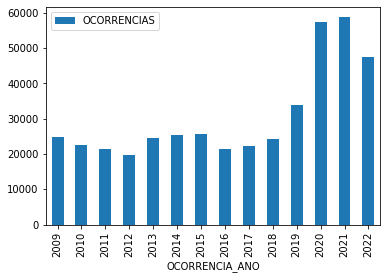

In [35]:
ocorrencias_por_ano.plot.bar()

Tornando a coluna de index em 'ANO' para ser entendido como uma label

In [37]:
ocorrencias_por_ano = ocorrencias_por_ano.reset_index()

ocorrencias_por_ano = ocorrencias_por_ano.rename({'index': 'ANO'}, axis = 1)

ocorrencias_por_ano['ANO'] = ocorrencias_por_ano['ANO'].astype(str)

ocorrencias_por_ano

,ANO,OCORRENCIA_ANO,OCORRENCIAS
0,0,2009,24903
1,1,2010,22531
2,2,2011,21484
3,3,2012,19776
4,4,2013,24470
5,5,2014,25303
6,6,2015,25566
7,7,2016,21469
8,8,2017,22137
9,9,2018,24153


PLOT COM MATPLOTLIB (optei por usar gráficos gerados por essa biblioteca)

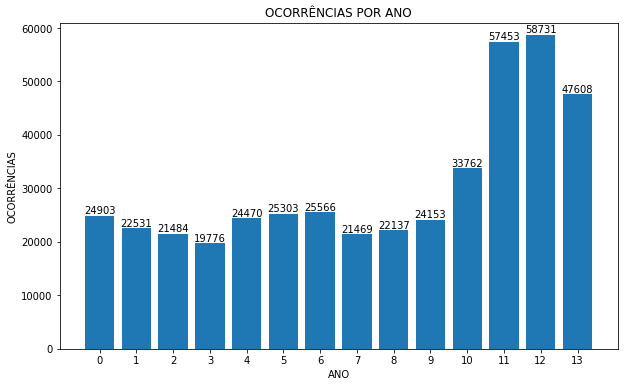

In [38]:
grafico_histograma(
    x_values = ocorrencias_por_ano['ANO'],
    y_values = ocorrencias_por_ano['OCORRENCIAS'],
    y_lim_bottom = 0,
    y_lim_top = 61000,
    x_label = 'ANO',
    y_label = 'OCORRÊNCIAS',
    titulo = 'OCORRÊNCIAS POR ANO',
    x_figure_dim = 10,
    y_figure_dim = 6,
    flag_anotacao = True
)

#### HISTOGRAMA NÚMERO DE OCORRÊNCIAS POR ANO per capita

In [39]:
# ocorrencias_por_ano['PER_CAPITA'] = round((ocorrencias_por_ano['OCORRENCIAS']/df_populacao_estimada_cwb['populacao_estimada'])*1000, 2)

df_populacao_estimada_cwb.set_index('ano', drop=True, inplace = True)
ocorrencias_por_ano.set_index('ANO', drop = True, inplace = True)

In [42]:
for index, reg in ocorrencias_por_ano.iterrows():
    ocorrencias_por_ano.at[index, 'PER_CAPITA'] = round((reg['OCORRENCIAS']/df_populacao_estimada_cwb.at[float(index), 'populacao_estimada'])*1000, 2)

KeyError: 0.0

In [ ]:
# df_populacao_estimada_cwb.reset_index(inplace = True)
ocorrencias_por_ano.reset_index(inplace = True)

In [ ]:
df_populacao_estimada_cwb

,codigo_ibge,populacao_estimada
ano,,
2001,4106902,1620219
2002,4106902,1644600
2003,4106902,1671194
2004,4106902,1727010
2005,4106902,1757904
2006,4106902,1788559
2007,4106902,1788559
2008,4106902,1828095
2009,4106902,1851215


In [44]:
ocorrencias_por_ano

,OCORRENCIA_ANO,OCORRENCIAS
ANO,,
0,2009,24903
1,2010,22531
2,2011,21484
3,2012,19776
4,2013,24470
5,2014,25303
6,2015,25566
7,2016,21469
8,2017,22137


In [45]:
grafico_histograma(
    x_values = ocorrencias_por_ano['ANO'],
    y_values = ocorrencias_por_ano['PER_CAPITA'],
    y_lim_bottom = 0,
    y_lim_top = 35,
    x_label = 'ANO',
    y_label = 'OCORRÊNCIAS PARA CADA 1000 HABITANTES',
    titulo = 'OCORRÊNCIAS POR ANO PARA CADA 1000 HABITANTES',
    x_figure_dim = 10,
    y_figure_dim = 6,
    flag_anotacao = True
)

KeyError: 'ANO'

#### VARIAÇÃO ANUAL EM % DA QUANTIDADE TOTAL DE OCORRÊNCIAS

Obtendo valores da diferença de ano para ano para o total de ocorrências

In [ ]:
# Variação de quantiadade de ocorrências de ano para ano
ocorrencias_por_ano['VARIACAO_PERCENTUAL_ANUAL'] = ocorrencias_por_ano['OCORRENCIAS'].pct_change().round(3)

# Define a variação pro ano inicial como sendo 0.
ocorrencias_por_ano.at[0, 'VARIACAO_PERCENTUAL_ANUAL'] = 0
ocorrencias_por_ano

,ANO,OCORRENCIAS,PER_CAPITA,VARIACAO_PERCENTUAL_ANUAL
0,2009,24903,13.45,0.000
1,2010,22531,12.17,-0.095
2,2011,21484,12.18,-0.046
3,2012,19776,11.13,-0.080
4,2013,24470,13.23,0.237
5,2014,25303,13.57,0.034
6,2015,25566,13.60,0.010
7,2016,21469,11.34,-0.160
8,2017,22137,11.60,0.031
9,2018,24153,12.60,0.091


Plotando gráfico que mostra as variações percentuais de ano para ano

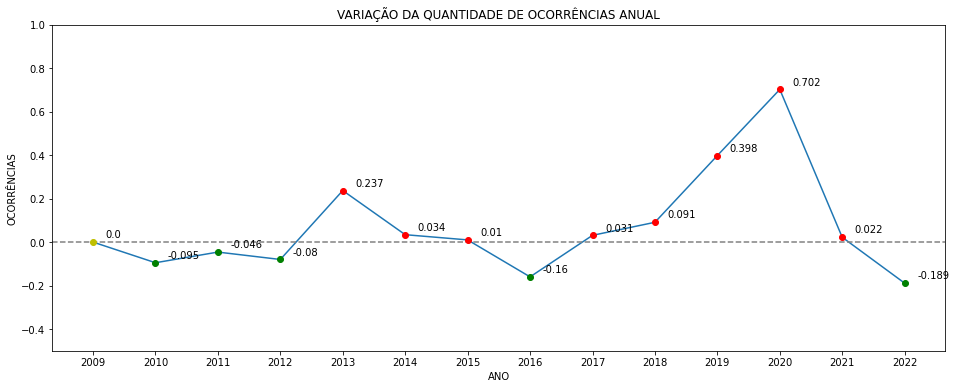

In [ ]:
grafico_variacao_percentual(
    x_values = ocorrencias_por_ano['ANO'],
    y_values = ocorrencias_por_ano['VARIACAO_PERCENTUAL_ANUAL'].values,
    y_lim_bottom = -0.5,
    y_lim_top = 1.0,
    x_label = 'ANO',
    y_label = 'OCORRÊNCIAS',
    titulo = 'VARIAÇÃO DA QUANTIDADE DE OCORRÊNCIAS ANUAL'
)

### OCORRENCIAS_MES

#### HISTOGRAMA DO NÚMERO DE OCORRÊNCIAS

Obtendo o número de ocorrencias por mês ao longo de todo o período [2009 ~ 2022]

In [ ]:
ocorrencias_por_mes = pd.DataFrame()
ocorrencias_por_mes['OCORRENCIAS'] = df_siges_interesse['OCORRENCIA_MES'].value_counts()
ocorrencias_por_mes

,OCORRENCIAS
3,38840
5,37766
7,37295
8,37167
10,36486
9,36078
4,36016
6,35361
1,34801
11,34035


Categorizando a coluna para identificar os meses

In [ ]:
# Ordena pelo indice para a atribuição de label estar correta
ocorrencias_por_mes = ocorrencias_por_mes.sort_index()
meses_ano = [
    'Jan', 'Fev', 'Mar', 'Abr',
    'Mai', 'Jun', 'Jul', 'Ago',
    'Set', 'Out', 'Nov', 'Dez'
]

ocorrencias_por_mes['MES'] = meses_ano
ocorrencias_por_mes

,OCORRENCIAS,MES
1,34801,Jan
2,32389,Fev
3,38840,Mar
4,36016,Abr
5,37766,Mai
6,35361,Jun
7,37295,Jul
8,37167,Ago
9,36078,Set
10,36486,Out


Plotando gráfico de barras com a quantidade de ocorrencias por mês em todo o período [2009 ~ 2022]

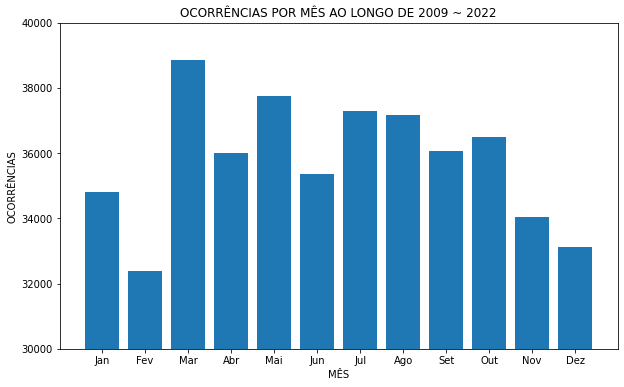

In [ ]:
grafico_histograma(
    x_values = ocorrencias_por_mes['MES'],
    y_values = ocorrencias_por_mes['OCORRENCIAS'],
    y_lim_bottom = 30000,
    y_lim_top = 40000,
    x_label = 'MÊS',
    y_label = 'OCORRÊNCIAS',
    titulo = 'OCORRÊNCIAS POR MÊS AO LONGO DE 2009 ~ 2022',
    x_figure_dim = 10,
    y_figure_dim = 6,
    flag_anotacao = False
)

#### NÚMERO DE OCORRÊNCIAS AGRUPADAS POR MÊS POR ANO

In [ ]:
df_siges_interesse['OCORRENCIA_DIA_MES'] = df_siges_interesse['OCORRENCIA_DATA'].dt.day
df_siges_interesse['OCORRENCIA_DIA_MES']

0          1
1          1
2          1
3          1
4          1
          ..
429341    12
429342    12
429343    12
429344    12
429345    12
Name: OCORRENCIA_DIA_MES, Length: 429346, dtype: int64

Copiando o dataframe de interesse para evitar inconsistências por conta das manipulações realizadas

In [ ]:
df_auxiliar: pd.DataFrame = df_siges_interesse.copy(deep=True)

Criando dataframe de ocorrências por mês por ano

In [ ]:
df_auxiliar['ANO_MES'] = df_auxiliar['OCORRENCIA_ANO'].astype(str) + '-' + df_auxiliar['OCORRENCIA_MES'].astype(str)
ocorrencias_por_ano_mes = pd.DataFrame(df_auxiliar.value_counts('ANO_MES'))
ocorrencias_por_ano_mes.rename({0: 'OCORRENCIAS'}, axis=1, inplace=True)
ocorrencias_por_ano_mes.reset_index(inplace=True)


In [ ]:
ocorrencias_por_ano_mes['ANO'] = ocorrencias_por_ano_mes['ANO_MES'].apply(lambda x: int(x.split('-')[0]))
ocorrencias_por_ano_mes['MES'] = ocorrencias_por_ano_mes['ANO_MES'].apply(lambda x: int(x.split('-')[1]))

Gerando a coluna apropriada de index

In [ ]:
ocorrencias_por_ano_mes.sort_values(by=['ANO', 'MES'], inplace=True)
ocorrencias_por_ano_mes

,ANO_MES,OCORRENCIAS,ANO,MES
57,2009-1,2227,2009,1
105,2009-2,1971,2009,2
70,2009-3,2133,2009,3
95,2009-4,2005,2009,4
104,2009-5,1974,2009,5
...,...,...,...,...
24,2022-8,4087,2022,8
31,2022-9,3960,2022,9
13,2022-10,4594,2022,10
29,2022-11,3980,2022,11


C:\Users\User\AppData\Local\Temp\ipykernel_18832\1237121660.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_values, rotation = 90)
C:\Users\User\AppData\Local\Temp\ipykernel_18832\1237121660.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


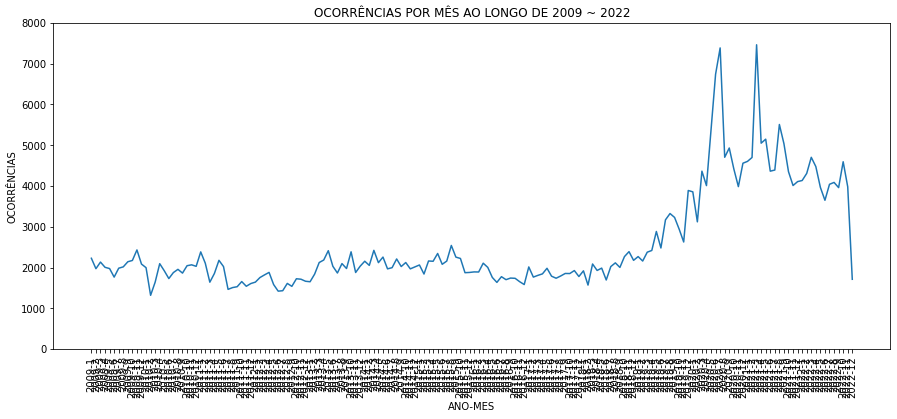

In [ ]:
grafico_linha(
    x_values = ocorrencias_por_ano_mes['ANO_MES'],
    y_values = ocorrencias_por_ano_mes['OCORRENCIAS'],
    y_lim_bottom = 0,
    y_lim_top = 8000,
    x_label = 'ANO-MES',
    y_label = 'OCORRÊNCIAS',
    titulo = 'OCORRÊNCIAS POR MÊS AO LONGO DE 2009 ~ 2022',
    x_figure_dim = 15,
    y_figure_dim = 6,
    flag_anotacao = False
)

Função aproximada

 
16.68 x + 1163


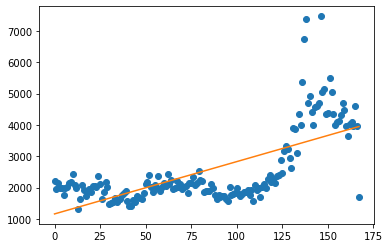

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Obter os valores de x
y = ocorrencias_por_ano_mes['OCORRENCIAS'].values

# Criar um array de valores de y correspondentes aos valores de x
x = [i for i in range(ocorrencias_por_ano_mes['OCORRENCIAS'].size)]

# Ajustar uma curva polinomial aos dados
deg = 1  # Grau do polinômio
coefficients = np.polyfit(x, y, deg)

# Criar uma função a partir dos coeficientes
p = np.poly1d(coefficients)

# Criar um array de valores de x para plotar a função aproximada
num_points = 1000
x_new = np.linspace(min(x), max(x), num_points)

# Avaliar a função aproximada em x_new
y_new = p(x_new)

print(p)
# Plotar os dados originais e a função aproximada
plt.plot(x, y, 'o')
plt.plot(x_new, y_new, '-')
plt.show()

#### GRÁFICO DE OCORRÊNCIAS POR 1000 HABITANTES PARA CADA MÊS DO ANO

In [ ]:
for i, reg in ocorrencias_por_ano_mes.iterrows():
    ocorrencias_por_ano_mes.at[i, 'PER_CAPITA'] = round((reg['OCORRENCIAS']/df_populacao_estimada_cwb.at[float(index), 'populacao_estimada'])*1000, 2)

In [ ]:
ocorrencias_por_ano_mes

,ANO_MES,OCORRENCIAS,ANO,MES,PER_CAPITA
57,2009-1,2227,2009,1,1.12
105,2009-2,1971,2009,2,0.99
70,2009-3,2133,2009,3,1.08
95,2009-4,2005,2009,4,1.01
104,2009-5,1974,2009,5,1.00
...,...,...,...,...,...
24,2022-8,4087,2022,8,2.06
31,2022-9,3960,2022,9,2.00
13,2022-10,4594,2022,10,2.32
29,2022-11,3980,2022,11,2.01


Obtendo as labels para os dias da semana em string

In [ ]:
ocorrencias_por_ano_mes['LABEL_MES'] = ocorrencias_por_ano_mes['MES'].replace({
    1:'JANEIRO',
    2:'FEVEREIRO',
    3:'MARÇO',
    4:'ABRIL',
    5:'MAIO',
    6:'JUNHO',
    7:'JULHO',
    8:'AGOSTO',
    9:'SETEMBRO',
    10:'OUTUBRO',
    11:'NOVEMBRO',
    12:'DEZEMBRO',
})

Criando o gráfico de linhas

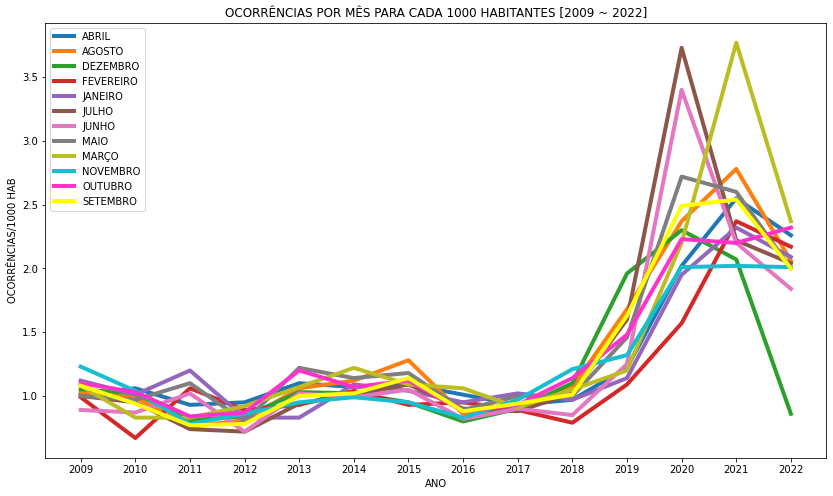

In [ ]:
data_grouped = ocorrencias_por_ano_mes.groupby('LABEL_MES')
# Definir cores para cada ano
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff33cc', '#ffff00']

plt.figure(figsize=(14, 8))
# Criar um plot para cada ano
for i, (mes, group) in enumerate(data_grouped):
    plt.plot(group['ANO'], group['PER_CAPITA'], linewidth=4, color=cores[i], label=str(mes))
plt.legend()
# personalização do gráfico
plt.title('OCORRÊNCIAS POR MÊS PARA CADA 1000 HABITANTES [2009 ~ 2022]')
plt.xlabel('ANO')
plt.ylabel('OCORRÊNCIAS/1000 HAB')
plt.xticks(range(2009, 2023))

plt.show()

#### NÚMERO DE OCORRÊNCIAS AGRUPADAS POR DIA MÊS ANO

In [ ]:
df_auxiliar['ANO_MES_DIA'] = df_auxiliar['OCORRENCIA_ANO'].astype(str) + '-' + df_auxiliar['OCORRENCIA_MES'].astype(str) + '-' + df_auxiliar['OCORRENCIA_DIA_MES'].astype(str)
ocorrencias_por_ano_mes_dia = pd.DataFrame(df_auxiliar.value_counts('ANO_MES_DIA'))
ocorrencias_por_ano_mes_dia.rename({0: 'OCORRENCIAS'}, axis=1, inplace=True)
ocorrencias_por_ano_mes_dia.reset_index(inplace=True)

In [ ]:
ocorrencias_por_ano_mes_dia['ANO'] = ocorrencias_por_ano_mes_dia['ANO_MES_DIA'].apply(lambda x: int(x.split('-')[0]))
ocorrencias_por_ano_mes_dia['MES'] = ocorrencias_por_ano_mes_dia['ANO_MES_DIA'].apply(lambda x: int(x.split('-')[1]))
ocorrencias_por_ano_mes_dia['DIA'] = ocorrencias_por_ano_mes_dia['ANO_MES_DIA'].apply(lambda x: int(x.split('-')[2]))

Gerando a coluna apropriada de index

In [ ]:
ocorrencias_por_ano_mes_dia.sort_values(by=['ANO', 'MES', 'DIA'], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_18832\1237121660.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_values, rotation = 90)
C:\Users\User\AppData\Local\Temp\ipykernel_18832\1237121660.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


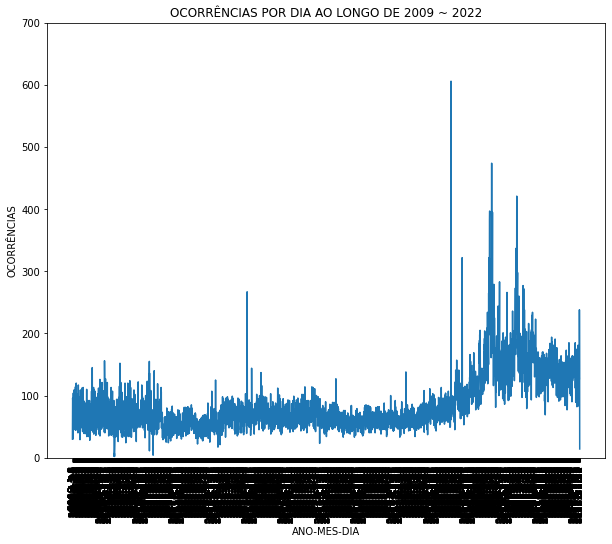

In [ ]:
grafico_linha(
    x_values = ocorrencias_por_ano_mes_dia['ANO_MES_DIA'],
    y_values = ocorrencias_por_ano_mes_dia['OCORRENCIAS'],
    y_lim_bottom = 0,
    y_lim_top = 700,
    x_label = 'ANO-MES-DIA',
    y_label = 'OCORRÊNCIAS',
    titulo = 'OCORRÊNCIAS POR DIA AO LONGO DE 2009 ~ 2022',
    x_figure_dim = 10,
    y_figure_dim = 8,
    flag_anotacao = False
)

#### NÚMERO DE OCORRÊNCIAS AGRUPADAS POR DIA MÊS ANO 2020

In [ ]:
ocorrencias_por_ano_mes_dia_2020 = ocorrencias_por_ano_mes_dia[ocorrencias_por_ano_mes_dia['ANO'] == 2020]
ocorrencias_por_ano_mes_dia_2020.sort_values(by=['ANO', 'MES', 'DIA'], inplace=True)
ocorrencias_por_ano_mes_dia_2020

C:\Users\User\AppData\Local\Temp\ipykernel_18832\512096021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocorrencias_por_ano_mes_dia_2020.sort_values(by=['ANO', 'MES', 'DIA'], inplace=True)


,ANO_MES_DIA,OCORRENCIAS,ANO,MES,DIA
1052,2020-1-1,112,2020,1,1
1266,2020-1-2,97,2020,1,2
871,2020-1-3,124,2020,1,3
1493,2020-1-4,89,2020,1,4
684,2020-1-5,137,2020,1,5
...,...,...,...,...,...
848,2020-12-27,126,2020,12,27
847,2020-12-28,126,2020,12,28
1023,2020-12-29,114,2020,12,29
309,2020-12-30,164,2020,12,30


C:\Users\User\AppData\Local\Temp\ipykernel_18832\1237121660.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_values, rotation = 90)
C:\Users\User\AppData\Local\Temp\ipykernel_18832\1237121660.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


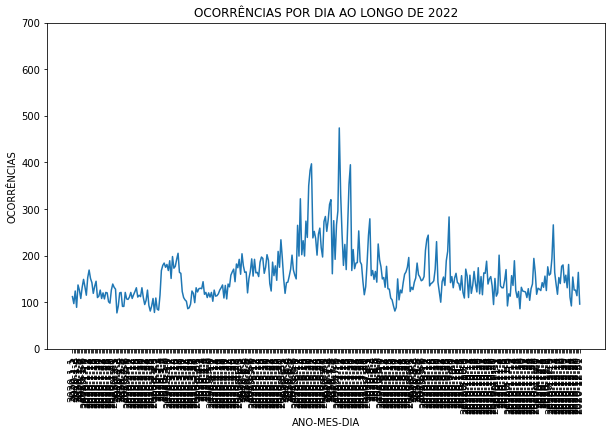

In [ ]:
grafico_linha(
    x_values = ocorrencias_por_ano_mes_dia_2020['ANO_MES_DIA'],
    y_values = ocorrencias_por_ano_mes_dia_2020['OCORRENCIAS'],
    y_lim_bottom = 0,
    y_lim_top = 700,
    x_label = 'ANO-MES-DIA',
    y_label = 'OCORRÊNCIAS',
    titulo = 'OCORRÊNCIAS POR DIA AO LONGO DE 2022',
    x_figure_dim = 10,
    y_figure_dim = 6,
    flag_anotacao = False
)

#### VARIAÇÃO PERCENTUAL MÊS A MÊS PARA A TOTALIDADE DO PERÍDO [2009 ~ 2022]

Obtendo valores da variação

In [ ]:
# Variação de quantiadade de ocorrências de mês para mês
ocorrencias_por_mes['VARIACAO_PERCENTUAL_MES'] = ocorrencias_por_mes['OCORRENCIAS'].pct_change().round(3)

# Define a variação pra janeiro
ocorrencias_por_mes.at[1, 'VARIACAO_PERCENTUAL_MES'] = round(
    ((ocorrencias_por_mes.at[1, 'OCORRENCIAS'] / ocorrencias_por_mes.at[12, 'OCORRENCIAS']) - 1),
    3
)
ocorrencias_por_mes

,OCORRENCIAS,MES,VARIACAO_PERCENTUAL_MES
1,34801,Jan,0.051
2,32389,Fev,-0.069
3,38840,Mar,0.199
4,36016,Abr,-0.073
5,37766,Mai,0.049
6,35361,Jun,-0.064
7,37295,Jul,0.055
8,37167,Ago,-0.003
9,36078,Set,-0.029
10,36486,Out,0.011


Plotando o gráfico

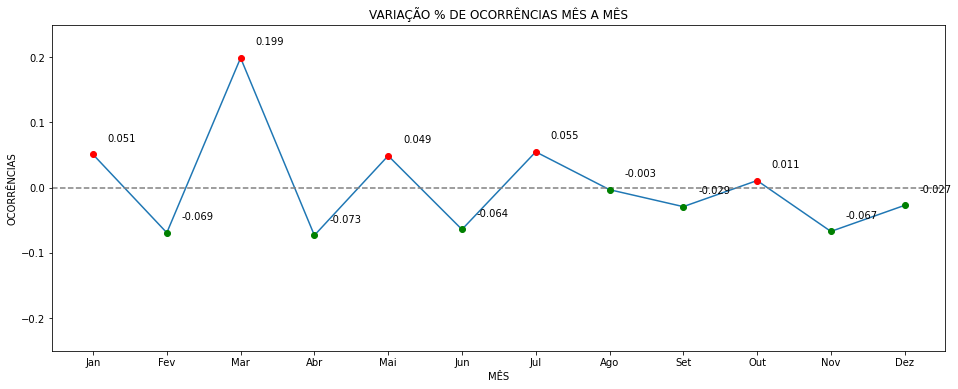

In [ ]:
grafico_variacao_percentual(
    x_values = ocorrencias_por_mes['MES'],
    y_values = ocorrencias_por_mes['VARIACAO_PERCENTUAL_MES'],
    y_lim_top = 0.25,
    y_lim_bottom = -0.25,
    x_label = 'MÊS',
    y_label = 'OCORRÊNCIAS',
    titulo = 'VARIAÇÃO % DE OCORRÊNCIAS MÊS A MÊS',
    flag_pontos_variacao = True
)

### OCORRENCIA_DIA_SEMANA

#### HISTOGRAMA DO NÚMERO DE OCORRÊNCIAS

Obtendo as ocorrências dia da semana mês ao longo de todo o período [2009 ~ 2022]

In [ ]:
ocorrencias_por_dia_semana = pd.DataFrame()
ocorrencias_por_dia_semana['OCORRENCIAS'] = df_siges_interesse['OCORRENCIA_DIA_SEMANA'].value_counts()
ocorrencias_por_dia_semana

,OCORRENCIAS
SÁBADO,69202
DOMINGO,65919
SEXTA,63172
QUINTA,61020
QUARTA,58610
TERÇA,56578
SEGUNDA,54845


Ordenando os dias da semana para iniciar no domingo e terminar no sábado

In [ ]:
ordem_dias_da_semana = [
    'DOMINGO',
    'SEGUNDA',
    'TERÇA',
    'QUARTA',
    'QUINTA',
    'SEXTA',
    'SÁBADO'
]
ocorrencias_por_dia_semana.index = pd.Categorical(
    ocorrencias_por_dia_semana.index,
    categories = ordem_dias_da_semana,
    ordered = True
)
ocorrencias_por_dia_semana.sort_index(inplace = True)
ocorrencias_por_dia_semana.reset_index(inplace = True)
ocorrencias_por_dia_semana.rename({'index': 'DIA_SEMANA'}, axis = 1, inplace = True)
ocorrencias_por_dia_semana

,DIA_SEMANA,OCORRENCIAS
0,DOMINGO,65919
1,SEGUNDA,54845
2,TERÇA,56578
3,QUARTA,58610
4,QUINTA,61020
5,SEXTA,63172
6,SÁBADO,69202


Plotando gráfico de barras que descreve a quantidade de ocorrências por dia da semana ao longo de todo o período

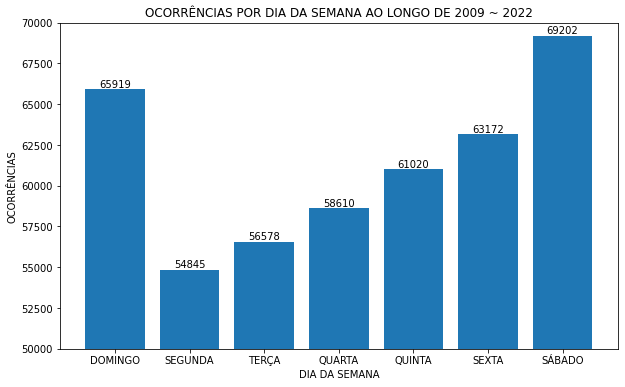

In [ ]:
grafico_histograma(
    x_values = ocorrencias_por_dia_semana['DIA_SEMANA'],
    y_values = ocorrencias_por_dia_semana['OCORRENCIAS'],
    y_lim_bottom = 50000,
    y_lim_top = 70000,
    x_label = 'DIA DA SEMANA',
    y_label = 'OCORRÊNCIAS',
    titulo = 'OCORRÊNCIAS POR DIA DA SEMANA AO LONGO DE 2009 ~ 2022',
    x_figure_dim = 10,
    y_figure_dim = 6,
    flag_anotacao = True
)

#### GRÁFICO DE OCORRÊNCIAS POR 1000 HABITANTES PARA CADA DIA DA SEMANA POR ANO

In [ ]:
df_auxiliar['OCORRENCIA_DIA_SEMANA'] = df_auxiliar['OCORRENCIA_DIA_SEMANA'].replace(
    {
        'DOMINGO': 1,
        'SEGUNDA': 2,
        'TERÇA': 3,
        'QUARTA': 4,
        'QUINTA': 5,
        'SEXTA': 6,
        'SÁBADO': 7
    }
)

df_auxiliar['ANO_DIA_SEMANA'] = df_auxiliar['OCORRENCIA_ANO'].astype(str) + '-' + df_auxiliar['OCORRENCIA_DIA_SEMANA'].astype(str)
ocorrencias_por_dia_semana_ano = pd.DataFrame(df_auxiliar.value_counts('ANO_DIA_SEMANA'))
ocorrencias_por_dia_semana_ano.rename({0: 'OCORRENCIAS'}, axis=1, inplace=True)
ocorrencias_por_dia_semana_ano.reset_index(inplace=True)
ocorrencias_por_dia_semana_ano

,ANO_DIA_SEMANA,OCORRENCIAS
0,2021-7,9893
1,2020-7,9557
2,2020-1,8830
3,2021-6,8779
4,2021-1,8598
...,...,...
93,2010-4,2674
94,2010-3,2642
95,2012-3,2577
96,2012-2,2524


In [ ]:
ocorrencias_por_dia_semana_ano['ANO'] = ocorrencias_por_dia_semana_ano['ANO_DIA_SEMANA'].apply(lambda x: int(x.split('-')[0]))
ocorrencias_por_dia_semana_ano['DIA_SEMANA'] = ocorrencias_por_dia_semana_ano['ANO_DIA_SEMANA'].apply(lambda x: int(x.split('-')[1]))

In [ ]:
ocorrencias_por_dia_semana_ano.sort_values(by=['ANO', 'DIA_SEMANA'], inplace=True)
ocorrencias_por_dia_semana_ano

,ANO_DIA_SEMANA,OCORRENCIAS,ANO,DIA_SEMANA
23,2009-1,5049,2009,1
90,2009-2,2729,2009,2
87,2009-3,2806,2009,3
81,2009-4,2909,2009,4
64,2009-5,3205,2009,5
...,...,...,...,...
18,2022-3,6563,2022,3
17,2022-4,6885,2022,4
16,2022-5,6990,2022,5
14,2022-6,7256,2022,6


In [ ]:
for i, reg in ocorrencias_por_dia_semana_ano.iterrows():
    ocorrencias_por_dia_semana_ano.at[i, 'PER_CAPITA'] = round((reg['OCORRENCIAS']/df_populacao_estimada_cwb.at[float(index), 'populacao_estimada'])*1000, 2)

In [ ]:
ocorrencias_por_dia_semana_ano

,ANO_DIA_SEMANA,OCORRENCIAS,ANO,DIA_SEMANA,PER_CAPITA
23,2009-1,5049,2009,1,2.55
90,2009-2,2729,2009,2,1.38
87,2009-3,2806,2009,3,1.42
81,2009-4,2909,2009,4,1.47
64,2009-5,3205,2009,5,1.62
...,...,...,...,...,...
18,2022-3,6563,2022,3,3.31
17,2022-4,6885,2022,4,3.47
16,2022-5,6990,2022,5,3.53
14,2022-6,7256,2022,6,3.66


Obtendo as labels para os dias da semana em string

In [ ]:
ocorrencias_por_dia_semana_ano['LABEL_DIA_SEMANA'] = ocorrencias_por_dia_semana_ano['DIA_SEMANA'].replace({
    1:'DOMINGO',
    2:'SEGUNDA',
    3:'TERÇA',
    4:'QUARTA',
    5:'QUINTA',
    6:'SEXTA',
    7:'SÁBADO'
})

Criando o gráfico de linhas

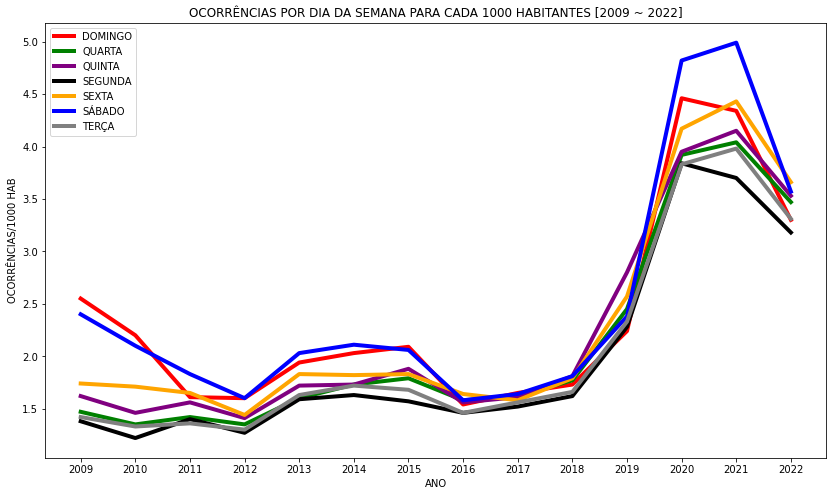

In [ ]:
data_grouped = ocorrencias_por_dia_semana_ano.groupby('LABEL_DIA_SEMANA')
# Definir cores para cada ano
colors = ['red', 'green', 'purple', 'black', 'orange', 'blue', 'gray']

plt.figure(figsize=(14, 8))
# Criar um plot para cada ano
for i, (year, group) in enumerate(data_grouped):
    plt.plot(group['ANO'], group['PER_CAPITA'], linewidth=4, color=colors[i], label=str(year))
plt.legend()
# personalização do gráfico
plt.title('OCORRÊNCIAS POR DIA DA SEMANA PARA CADA 1000 HABITANTES [2009 ~ 2022]')
plt.xlabel('ANO')
plt.ylabel('OCORRÊNCIAS/1000 HAB')
plt.xticks(range(2009, 2023))

plt.show()

#### VARIAÇÃO PERCENTUAL DO NÚMERO DE OCORRÊNCIAS POR DIA DA SEMANA

Obtendo valores das variações para os dias da semana

In [ ]:
# Variação de quantiadade de ocorrências de dia pra dia da semana
ocorrencias_por_dia_semana['VARIACAO_PERCENTUAL_DIA_SEMANA'] = ocorrencias_por_dia_semana['OCORRENCIAS'].pct_change().round(3)

# Define a variação pra DOMINGO
ocorrencias_por_dia_semana.at[0, 'VARIACAO_PERCENTUAL_DIA_SEMANA'] = round(
    ((ocorrencias_por_dia_semana.at[0, 'OCORRENCIAS'] / ocorrencias_por_dia_semana.at[6, 'OCORRENCIAS']) - 1),
    3
)
ocorrencias_por_dia_semana

,DIA_SEMANA,OCORRENCIAS,VARIACAO_PERCENTUAL_DIA_SEMANA
0,DOMINGO,65919,-0.047
1,SEGUNDA,54845,-0.168
2,TERÇA,56578,0.032
3,QUARTA,58610,0.036
4,QUINTA,61020,0.041
5,SEXTA,63172,0.035
6,SÁBADO,69202,0.095


Plotando o gráfico

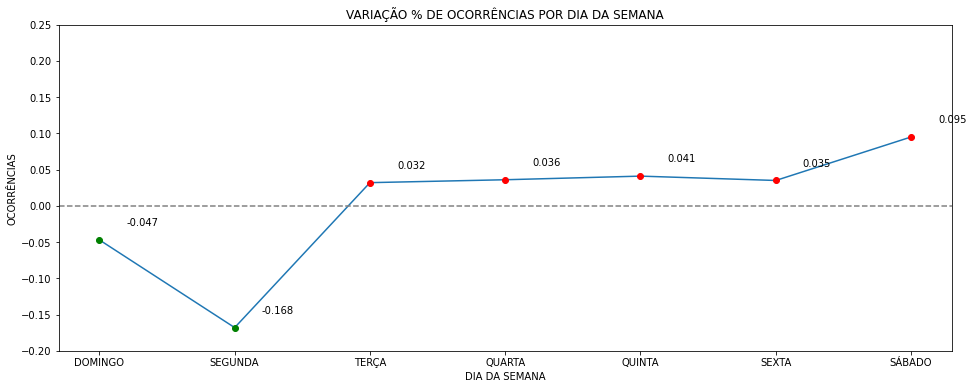

In [ ]:
grafico_variacao_percentual(
    x_values = ocorrencias_por_dia_semana['DIA_SEMANA'],
    y_values = ocorrencias_por_dia_semana['VARIACAO_PERCENTUAL_DIA_SEMANA'],
    y_lim_top = 0.25,
    y_lim_bottom = -0.2,
    x_label = 'DIA DA SEMANA',
    y_label = 'OCORRÊNCIAS',
    titulo = 'VARIAÇÃO % DE OCORRÊNCIAS POR DIA DA SEMANA',
    flag_pontos_variacao = True
)

### OCORRENCIA_HORA_DIA

#### HISTOGRAMA DO NÚMERO DE OCORRÊNCIAS POR HORA DO DIA

Obtendo apenas a hora das ocorrências

In [48]:
df_siges_interesse['OCORRENCIA_HORA_DIA'] = df_siges_interesse['OCORRENCIA_DATA'].dt.hour
df_siges_interesse['OCORRENCIA_HORA_DIA']

0         15
1         15
2         15
3         16
4         16
          ..
429341     6
429342     6
429343     6
429344     6
429345     7
Name: OCORRENCIA_HORA_DIA, Length: 429346, dtype: int32

Obtendo o número de ocorrências por hora

In [ ]:
ocorrencias_por_hora_dia = pd.DataFrame()
ocorrencias_por_hora_dia['OCORRENCIAS'] = df_siges_interesse['OCORRENCIA_HORA_DIA'].value_counts()
ocorrencias_por_hora_dia.sort_index(inplace = True)
ocorrencias_por_hora_dia.reset_index(inplace = True)
ocorrencias_por_hora_dia.rename({'index': 'HORA_DIA'}, axis = 1, inplace = True)
ocorrencias_por_hora_dia['HORA_DIA'] = ocorrencias_por_hora_dia['HORA_DIA'].astype(str)
ocorrencias_por_hora_dia

,HORA_DIA,OCORRENCIAS
0,0,15163
1,1,11147
2,2,8281
3,3,6102
4,4,4752
5,5,5233
6,6,5060
7,7,10855
8,8,17551
9,9,21556


Obtendo gráfico de número de ocorrências registradas por hora do dia

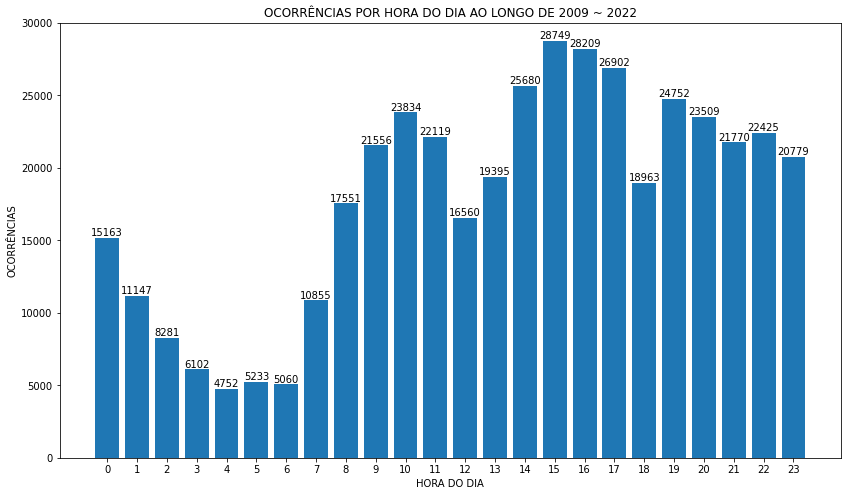

In [ ]:
grafico_histograma(
    x_values = ocorrencias_por_hora_dia['HORA_DIA'],
    y_values = ocorrencias_por_hora_dia['OCORRENCIAS'],
    y_lim_bottom = 0,
    y_lim_top = 30000,
    x_label = 'HORA DO DIA',
    y_label = 'OCORRÊNCIAS',
    titulo = 'OCORRÊNCIAS POR HORA DO DIA AO LONGO DE 2009 ~ 2022',
    x_figure_dim = 14,
    y_figure_dim = 8,
    flag_anotacao = True
)

#### VARIAÇÃO PERCENTUAL DE OCORRÊNCIAS POR HORA DO DIA

Calculando as variações percentuais

In [ ]:
# Variação de quantiadade de ocorrências de hora para hora
ocorrencias_por_hora_dia['VARIACAO_PERCENTUAL_HORA_DIA'] = ocorrencias_por_hora_dia['OCORRENCIAS'].pct_change().round(3)

# Define a variação de meia noite
ocorrencias_por_hora_dia.at[0, 'VARIACAO_PERCENTUAL_HORA_DIA'] = round(
    ((ocorrencias_por_hora_dia.at[0, 'OCORRENCIAS'] / ocorrencias_por_hora_dia.at[23, 'OCORRENCIAS']) - 1),
    3
)
ocorrencias_por_hora_dia


,HORA_DIA,OCORRENCIAS,VARIACAO_PERCENTUAL_HORA_DIA
0,0,15163,-0.270
1,1,11147,-0.265
2,2,8281,-0.257
3,3,6102,-0.263
4,4,4752,-0.221
5,5,5233,0.101
6,6,5060,-0.033
7,7,10855,1.145
8,8,17551,0.617
9,9,21556,0.228


Obtendo o gráfico

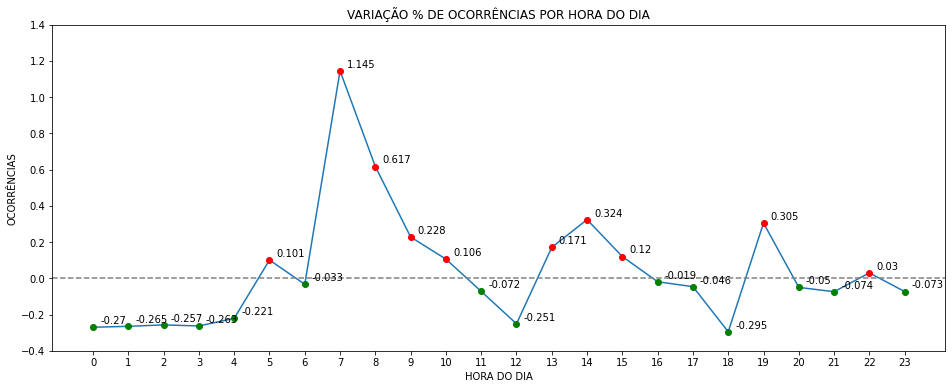

In [ ]:
grafico_variacao_percentual(
    x_values = ocorrencias_por_hora_dia['HORA_DIA'],
    y_values = ocorrencias_por_hora_dia['VARIACAO_PERCENTUAL_HORA_DIA'],
    y_lim_top = 1.4,
    y_lim_bottom = -0.4,
    x_label = 'HORA DO DIA',
    y_label = 'OCORRÊNCIAS',
    titulo = 'VARIAÇÃO % DE OCORRÊNCIAS POR HORA DO DIA',
    flag_pontos_variacao = True
)

### OCORRENCIA_DIA_MES

#### HISTOGRAMA DO NÚMERO DE OCORRÊNCIAS POR DIA DO MÊS [2009 ~ 2022]

Obtendo o valor do dia da data

In [ ]:
df_siges_interesse['OCORRENCIA_DIA_MES'] = df_siges_interesse['OCORRENCIA_DATA'].dt.day
df_siges_interesse['OCORRENCIA_DIA_MES']

0          1
1          1
2          1
3          1
4          1
          ..
429341    12
429342    12
429343    12
429344    12
429345    12
Name: OCORRENCIA_DIA_MES, Length: 429346, dtype: int64

Obtendo o número de ocorrências por dia do mês.

In [ ]:
ocorrencias_por_dia_mes = pd.DataFrame()
ocorrencias_por_dia_mes['OCORRENCIAS'] = df_siges_interesse['OCORRENCIA_DIA_MES'].value_counts()
ocorrencias_por_dia_mes.sort_index(inplace = True)
ocorrencias_por_dia_mes.reset_index(inplace = True)
ocorrencias_por_dia_mes.rename({'index': 'DIA_MES'}, axis = 1, inplace = True)
ocorrencias_por_dia_mes['DIA_MES'] = ocorrencias_por_dia_mes['DIA_MES'].astype(str)
ocorrencias_por_dia_mes

,DIA_MES,OCORRENCIAS
0,1,13858
1,2,13814
2,3,13911
3,4,14046
4,5,14323
5,6,13916
6,7,13757
7,8,13932
8,9,14213
9,10,14238


Plotando gráfico de número de ocorrências por mês durante todo o período [2009 ~ 2022]

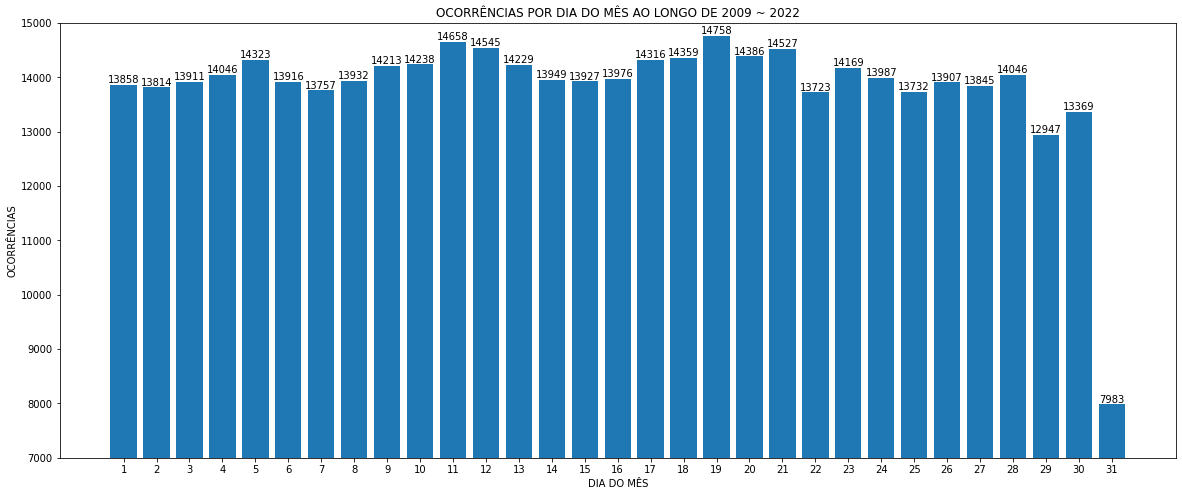

In [ ]:
grafico_histograma(
    x_values = ocorrencias_por_dia_mes['DIA_MES'],
    y_values = ocorrencias_por_dia_mes['OCORRENCIAS'],
    y_lim_bottom = 7000,
    y_lim_top = 15000,
    x_label = 'DIA DO MÊS',
    y_label = 'OCORRÊNCIAS',
    titulo = 'OCORRÊNCIAS POR DIA DO MÊS AO LONGO DE 2009 ~ 2022',
    x_figure_dim = 20,
    y_figure_dim = 8,
    flag_anotacao = True
)

O mesmo gráfico apenas ignorando o dia 31

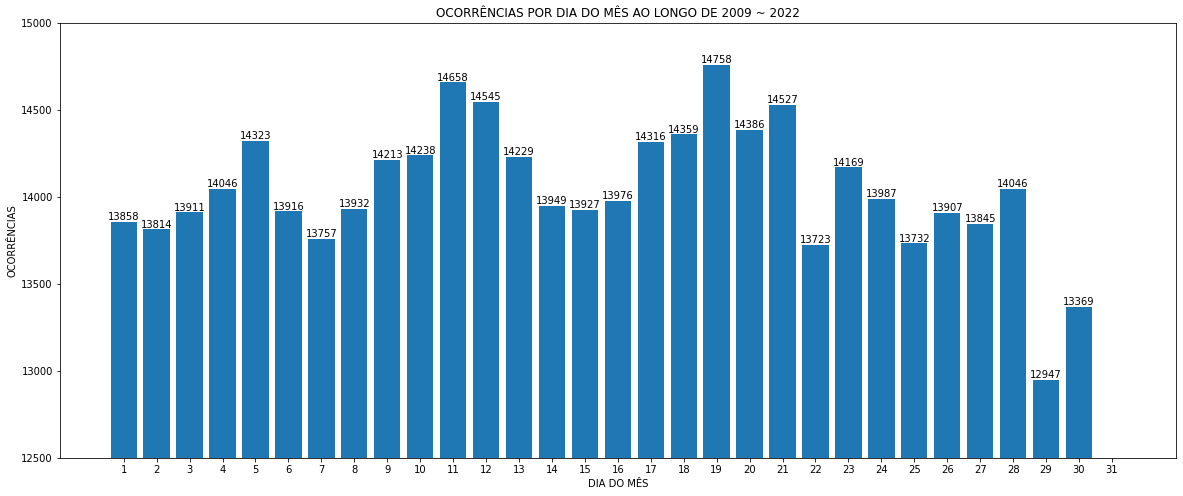

In [ ]:
grafico_histograma(
    x_values = ocorrencias_por_dia_mes['DIA_MES'],
    y_values = ocorrencias_por_dia_mes['OCORRENCIAS'],
    y_lim_bottom = 12500,
    y_lim_top = 15000,
    x_label = 'DIA DO MÊS',
    y_label = 'OCORRÊNCIAS',
    titulo = 'OCORRÊNCIAS POR DIA DO MÊS AO LONGO DE 2009 ~ 2022',
    x_figure_dim = 20,
    y_figure_dim = 8,
    flag_anotacao = True
)

#### VARIAÇÃO PERCENTUAL POR DIA DO MÊS [2009 ~ 2022]

In [ ]:
# Variação de quantiadade de ocorrências dia a dia do mês
ocorrencias_por_dia_mes['VARIACAO_PERCENTUAL_DIA_MES'] = ocorrencias_por_dia_mes['OCORRENCIAS'].pct_change().round(3)

# Define a variação dos dias 1 e 31
ocorrencias_por_dia_mes.at[0, 'VARIACAO_PERCENTUAL_DIA_MES'] = 0
ocorrencias_por_dia_mes.at[30, 'VARIACAO_PERCENTUAL_DIA_MES'] = 0
ocorrencias_por_dia_mes


,DIA_MES,OCORRENCIAS,VARIACAO_PERCENTUAL_DIA_MES
0,1,13858,0.000
1,2,13814,-0.003
2,3,13911,0.007
3,4,14046,0.010
4,5,14323,0.020
5,6,13916,-0.028
6,7,13757,-0.011
7,8,13932,0.013
8,9,14213,0.020
9,10,14238,0.002


Obtendo o gráfico

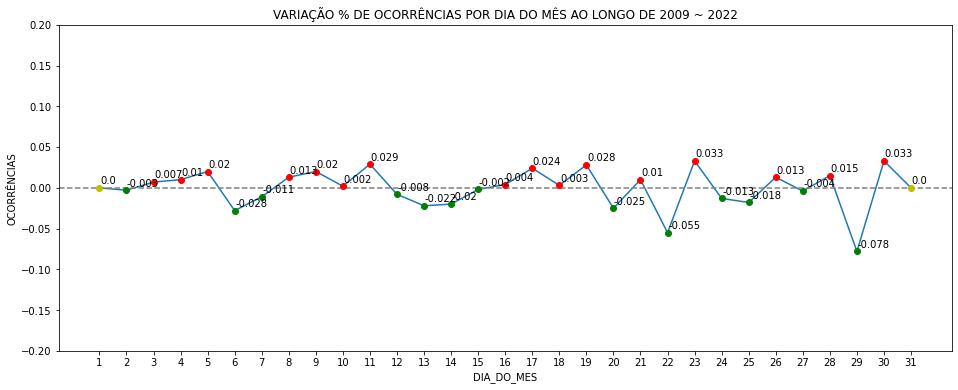

In [ ]:
grafico_variacao_percentual(
    x_values = ocorrencias_por_dia_mes['DIA_MES'],
    y_values = ocorrencias_por_dia_mes['VARIACAO_PERCENTUAL_DIA_MES'],
    y_lim_top = 0.2,
    y_lim_bottom = -0.2,
    x_label = 'DIA_DO_MES',
    y_label = 'OCORRÊNCIAS',
    titulo = 'VARIAÇÃO % DE OCORRÊNCIAS POR DIA DO MÊS AO LONGO DE 2009 ~ 2022',
    flag_pontos_variacao = True,
    dx_pos_anotacao = 0.02,
    dy_pos_anotacao = 0.005
)

### ATENDIMENTO_BAIRRO_NOME

##### VERIFICANDO OS VALORES DA COLUNA

Corrigindo valores duplicados ou com espaços

In [ ]:
dict_remap_bairro_nome = {
    "CIDADE INDUSTRIAL": "CIDADE INDUSTRIAL DE CURITIBA",
    "CIDADE INDUSTRIAL DE": "CIDADE INDUSTRIAL DE CURITIBA",
    "CIC": "CIDADE INDUSTRIAL DE CURITIBA",
    "CENTRO ": "CENTRO",
    " JARDIM OSASCO": "JARDIM OSASCO",
    "BOQUEIRÃO ": "BOQUEIRÃO",
    " JARDIM PEDRO DEMETE": "JARDIM PEDRO DEMETE",
    "AFONSO PENA ": "AFONSO PENA",
    "ÁGUAS BELAS": "AGUAS BELAS",
    "IGUAÇU 01": "IGUAÇÚ 1"
}
df_siges_interesse['ATENDIMENTO_BAIRRO_NOME'] = df_siges_interesse['ATENDIMENTO_BAIRRO_NOME'].replace(dict_remap_bairro_nome)

Funções para propósitos de verificação dos valores apenas

In [ ]:
def printa_valores_unicos_coluna(data_frame: pd.DataFrame, nome_coluna: str):
    for bairro in data_frame[nome_coluna].unique():
        print(bairro)
    print('\n\n')

def printa_valores_coluna(data_frame: pd.DataFrame, nome_coluna: str):
    for bairro in data_frame[nome_coluna]:
        print(bairro)
    print('\n\n')

Removendo labels indesejadas

In [ ]:
df_drop_bairro_nome = df_siges_interesse.dropna(subset='ATENDIMENTO_BAIRRO_NOME', axis=0)

valores_serem_removidos = [
    'NI',
    'NF',
    'BAIRRO NÃO LOCALIZAD',
    'NÃO ENCONTRADO',
    'NÃO INFORMADO '
]

# DROPANDO LINHAS QUE CONTENHAM ALGUM DOS VALORES ACIMA
for valor in valores_serem_removidos:
    df_drop_bairro_nome = df_drop_bairro_nome.drop(df_drop_bairro_nome[
        df_drop_bairro_nome['ATENDIMENTO_BAIRRO_NOME'] == valor
    ].index)

printa_valores_unicos_coluna(df_drop_bairro_nome, 'ATENDIMENTO_BAIRRO_NOME')


CIDADE INDUSTRIAL DE CURITIBA
FAZENDINHA
UBERABA
SÍTIO CERCADO
TATUQUARA
SANTA CÂNDIDA
BOQUEIRÃO
CENTRO
BOA VISTA
TABOÃO
XAXIM
PILARZINHO
REBOUÇAS
ÁGUA VERDE
BATEL
NOVO MUNDO
ALTO BOQUEIRÃO
CAPÃO RASO
JARDIM BOTÂNICO
PORTÃO
ORLEANS
SANTA FELICIDADE
CASCATINHA
CAPÃO DA IMBUIA
BARREIRINHA
SEMINÁRIO
CAMPO COMPRIDO
PRADO VELHO
PINHEIRINHO
BUTIATUVINHA
CAMPINA DO SIQUEIRA
CAJURU
SÃO FRANCISCO
CENTRO CÍVICO
SÃO BRAZ
UMBARÁ
CAXIMBA
JARDIM SOCIAL
BACACHERI
CAMPO DE SANTANA
SANTO INÁCIO
JARDIM DAS AMÉRICAS
LINDÓIA
GANCHINHO
PAROLIN
ABRANCHES
SÃO JOÃO
ATUBA
TARUMÃ
ALTO DA RUA XV
MOSSUNGUÊ
TINGUI
BIGORRILHO
BAIRRO ALTO
HAUER
VILA IZABEL
CABRAL
BOM RETIRO
GUAÍRA
CACHOEIRA
AUGUSTA
CRISTO REI
AHÚ
ALTO DA GLÓRIA
GUABIROTUBA
MERCÊS
SANTA QUITÉRIA
SÃO MIGUEL
SÃO LOURENÇO
FANNY
JUVEVÊ
VISTA ALEGRE
HUGO LANGE
RIVIERA
LAMENHA PEQUENA
INDICAÇÕES CANCELADA
BAIRRO NAO INFORMADO
BAIRRO FICTÍCIO
TINGÜI
CIDADE JARDIM
VENEZA
PLANTA MEIRELES
TANGUA
MONTE REY
JD EUROPA
BORDA DO CAMPO
JARDIM BOA VISTA
SÃO JOSE
JARD

Obtendo número de ocorrências por bairro

In [ ]:
ocorrencias_por_bairro = pd.DataFrame()
ocorrencias_por_bairro['OCORRENCIAS'] = df_drop_bairro_nome['ATENDIMENTO_BAIRRO_NOME'].value_counts()
ocorrencias_por_bairro = ocorrencias_por_bairro.sort_values( by = 'OCORRENCIAS', ascending = False)
ocorrencias_por_bairro

,OCORRENCIAS
CENTRO,73560
CIDADE INDUSTRIAL DE CURITIBA,29623
SÍTIO CERCADO,26284
CAJURU,19772
BOQUEIRÃO,19339
...,...
SÃO GERONIMO,1
OURO FINO,1
SANTO ANTÔNIO,1
CAMPINHA GRANDE DO S,1


Mudando index do dataframe de ocorrências

In [ ]:
ocorrencias_por_bairro.reset_index(inplace = True)
ocorrencias_por_bairro.rename({'index': 'BAIRRO'}, axis = 1, inplace = True)
ocorrencias_por_bairro

,BAIRRO,OCORRENCIAS
0,CENTRO,73560
1,CIDADE INDUSTRIAL DE CURITIBA,29623
2,SÍTIO CERCADO,26284
3,CAJURU,19772
4,BOQUEIRÃO,19339
...,...,...
174,SÃO GERONIMO,1
175,OURO FINO,1
176,SANTO ANTÔNIO,1
177,CAMPINHA GRANDE DO S,1


#### HISTOGRAMA DAS OCORRÊNCIAS POR BAIRRO DO PERÍODO [2009 ~ 2022]
- Para os 30 bairros com mais ocorrencias

In [ ]:
aux_top30_bairros_mais_ocorrencias = ocorrencias_por_bairro.loc[:29, :]
print(len(aux_top30_bairros_mais_ocorrencias))
aux_top30_bairros_mais_ocorrencias

30


,BAIRRO,OCORRENCIAS
0,CENTRO,73560
1,CIDADE INDUSTRIAL DE CURITIBA,29623
2,SÍTIO CERCADO,26284
3,CAJURU,19772
4,BOQUEIRÃO,19339
5,SÃO FRANCISCO,13421
6,TATUQUARA,10467
7,CAPÃO RASO,9855
8,ALTO BOQUEIRÃO,9567
9,PORTÃO,8462


Plotando o gráfico de barras

C:\Users\User\AppData\Local\Temp\ipykernel_18832\1465904140.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_values, rotation = 90)
C:\Users\User\AppData\Local\Temp\ipykernel_18832\1465904140.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


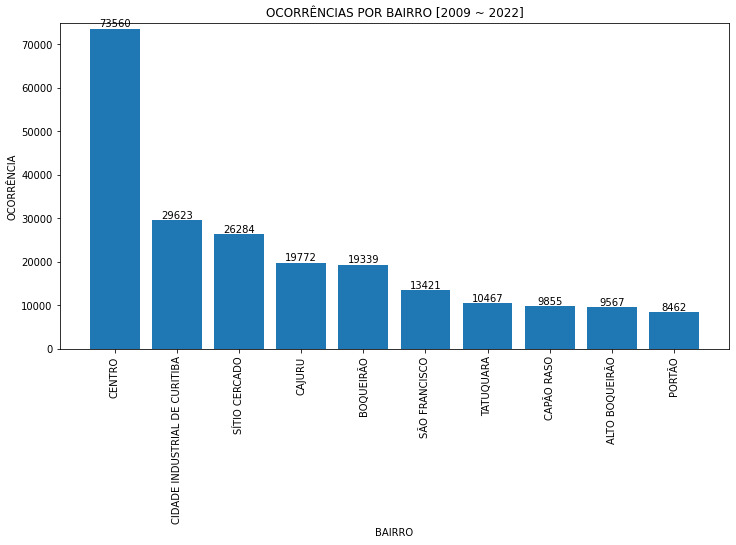

In [ ]:
grafico_histograma_label_vertical(
    x_values = aux_top30_bairros_mais_ocorrencias['BAIRRO'][:10],
    y_values = aux_top30_bairros_mais_ocorrencias['OCORRENCIAS'][:10],
    y_lim_bottom = 0,
    y_lim_top = 75000,
    x_label = 'BAIRRO',
    y_label = 'OCORRÊNCIA',
    titulo = 'OCORRÊNCIAS POR BAIRRO [2009 ~ 2022]',
    x_figure_dim = 12,
    y_figure_dim = 6,
    flag_anotacao = True
)

O mesmo gráfico de barras, porém sem o centro

C:\Users\User\AppData\Local\Temp\ipykernel_18832\1465904140.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_values, rotation = 90)
C:\Users\User\AppData\Local\Temp\ipykernel_18832\1465904140.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


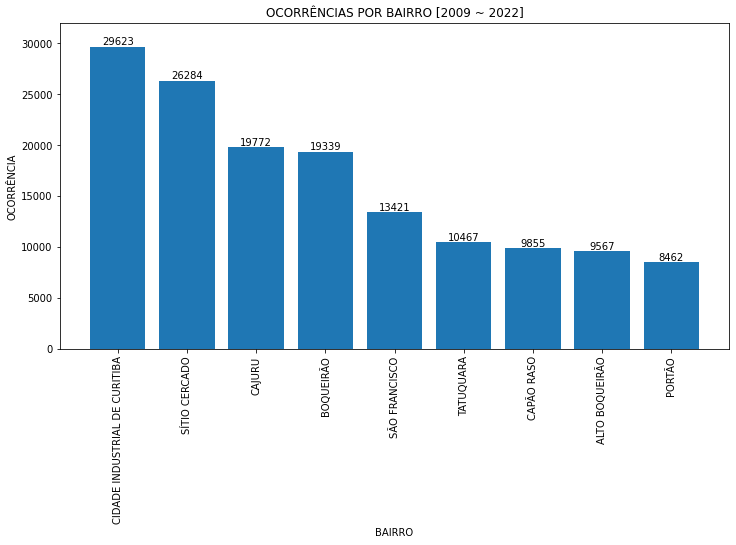

In [ ]:
grafico_histograma_label_vertical(
    x_values = aux_top30_bairros_mais_ocorrencias['BAIRRO'][1:10],
    y_values = aux_top30_bairros_mais_ocorrencias['OCORRENCIAS'][1:10],
    y_lim_top = 32000,
    y_lim_bottom = 0,
    x_label = 'BAIRRO',
    y_label = 'OCORRÊNCIA',
    titulo = 'OCORRÊNCIAS POR BAIRRO [2009 ~ 2022]',
    x_figure_dim = 12,
    y_figure_dim = 6,
    flag_anotacao = True
)

#### GRÁFICO COM GEOPANDAS
- Tentativa de um gráfico por bairro de curitiba (Fonte dados geográficos: [http://ippuc.org.br/geodownloads/geo.htm])

Obtendo dataframe com os as informações geográficas 

In [ ]:
# Carrega o shapefile com os bairros de Curitiba
df_curitiba_bairros: pd.DataFrame = gpd.read_file('.\\DIVISA DE BAIRROS\\DIVISA_DE_BAIRROS.shx')
df_curitiba_bairros.columns

Index(['OBJECTID', 'CODIGO', 'TIPO', 'NOME', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry'],
      dtype='object')

Obtendo o DataFrame do sigesguarda apenas com os bairros que possuem representação geográfica

In [ ]:
df_bairros_com_representacao = df_drop_bairro_nome.copy()

bairros_com_representacao = df_curitiba_bairros['NOME'].values
df_bairros_com_representacao = df_bairros_com_representacao[df_bairros_com_representacao['ATENDIMENTO_BAIRRO_NOME'].isin(bairros_com_representacao)]

sum(df_bairros_com_representacao['ATENDIMENTO_BAIRRO_NOME'].value_counts())

429033

Obtendo o número de ocorrencias para cada bairro

In [ ]:
ocorr_bairro_com_representacao = pd.DataFrame()
ocorr_bairro_com_representacao['OCORRENCIAS'] = df_bairros_com_representacao['ATENDIMENTO_BAIRRO_NOME'].value_counts()
ocorr_bairro_com_representacao

,OCORRENCIAS
CENTRO,73560
CIDADE INDUSTRIAL DE CURITIBA,29623
SÍTIO CERCADO,26284
CAJURU,19772
BOQUEIRÃO,19339
...,...
JARDIM SOCIAL,604
HUGO LANGE,573
CASCATINHA,366
LAMENHA PEQUENA,74


Incluindo a coluna OCORRENCIAS no df_curitiba_bairros

In [ ]:
df_curitiba_bairros = df_curitiba_bairros.set_index('NOME')

# Cria um dicionário mapeando os valores de index de df_curitiba_bairros com os valores correspondentes da coluna 'OCORRENCIAS' de ocorr_bairro_com_representacao
dict_remap = dict(zip(ocorr_bairro_com_representacao.index, ocorr_bairro_com_representacao['OCORRENCIAS']))

# Utiliza o método map() para alinhar os valores da coluna 'OCORRENCIAS' de ocorr_bairro_com_representacao com o índice do DataFrame df_curitiba_bairros
df_curitiba_bairros['OCORRENCIAS'] = df_curitiba_bairros.index.map(dict_remap)

# Volta com o índice ao normal
df_curitiba_bairros = df_curitiba_bairros.reset_index()
df_curitiba_bairros

,NOME,OBJECTID,CODIGO,TIPO,FONTE,CD_REGIONA,NM_REGIONA,SHAPE_AREA,SHAPE_LEN,geometry,OCORRENCIAS
0,ÁGUA VERDE,20,9.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,7.0,REGIONAL PORTÃO,4.773046e+06,9760.918367,"POLYGON ((673879.287 7183803.691, 673907.541 7...",7843
1,JARDIM SOCIAL,22,18.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,1.0,REGIONAL MATRIZ,1.958422e+06,6055.953058,"POLYGON ((678071.018 7187798.489, 678071.550 7...",604
2,XAXIM,23,57.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,2.0,REGIONAL BOQUEIRÃO,9.085391e+06,13783.592828,"POLYGON ((674448.852 7179898.885, 674532.900 7...",7007
3,JARDIM DAS AMÉRICAS,5,22.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,3.0,REGIONAL CAJURU,3.859034e+06,8818.503767,"POLYGON ((678209.542 7181641.525, 678107.870 7...",2157
4,GUAÍRA,9,26.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,7.0,REGIONAL PORTÃO,2.311397e+06,6351.958996,"POLYGON ((672709.614 7181167.829, 672599.420 7...",2749
...,...,...,...,...,...,...,...,...,...,...,...
70,VISTA ALEGRE,69,31.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,5.0,REGIONAL SANTA FELICIDADE,3.698848e+06,10150.085813,"POLYGON ((670685.577 7190127.767, 670738.147 7...",1524
71,SÃO BRAZ,70,60.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,5.0,REGIONAL SANTA FELICIDADE,5.060315e+06,11698.605208,"POLYGON ((666526.702 7189297.194, 666532.818 7...",2709
72,SÃO JOÃO,71,48.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,5.0,REGIONAL SANTA FELICIDADE,3.036122e+06,8110.401859,"POLYGON ((670541.326 7191452.778, 670581.372 7...",1976
73,CASCATINHA,74,47.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,5.0,REGIONAL SANTA FELICIDADE,2.182142e+06,8730.820987,"POLYGON ((670467.226 7189102.620, 670469.130 7...",366


PLOTANDO OS GRÁFICOS

Plotando o mapa com as ocorrências por bairro

In [ ]:
df_curitiba_bairros_pop = pd.read_excel('divisa_bairros.xlsx')

In [ ]:
df_curitiba_bairros = df_curitiba_bairros.set_index('NOME')

# Cria um dicionário mapeando os valores de index de df_curitiba_bairros com os valores correspondentes da coluna 'OCORRENCIAS' de ocorr_bairro_com_representacao
dict_remap = dict(zip(df_curitiba_bairros_pop['NOME'], df_curitiba_bairros_pop['POPULACAO_2020']))

# Utiliza o método map() para alinhar os valores da coluna 'OCORRENCIAS' de ocorr_bairro_com_representacao com o índice do DataFrame df_curitiba_bairros
df_curitiba_bairros['POPULACAO_2020'] = df_curitiba_bairros.index.map(dict_remap)

df_curitiba_bairros = df_curitiba_bairros.reset_index()

df_curitiba_bairros['OCORR_NORM'] = df_curitiba_bairros['OCORRENCIAS']/df_curitiba_bairros['POPULACAO_2020']*1000


Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry', 'OCORRENCIAS',
       'OCORR_NORM', 'POPULACAO_2020'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry', 'OCORRENCIAS',
       'OCORR_NORM', 'POPULACAO_2020'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry', 'OCORRENCIAS',
       'OCORR_NORM', 'POPULACAO_2020'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry', 'OCORRENCIAS',
       'OCORR_NORM', 'POPULACAO_2020'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry', 'OCORRENCIAS',
       'OCORR_NORM', 'POPULACAO_2020'

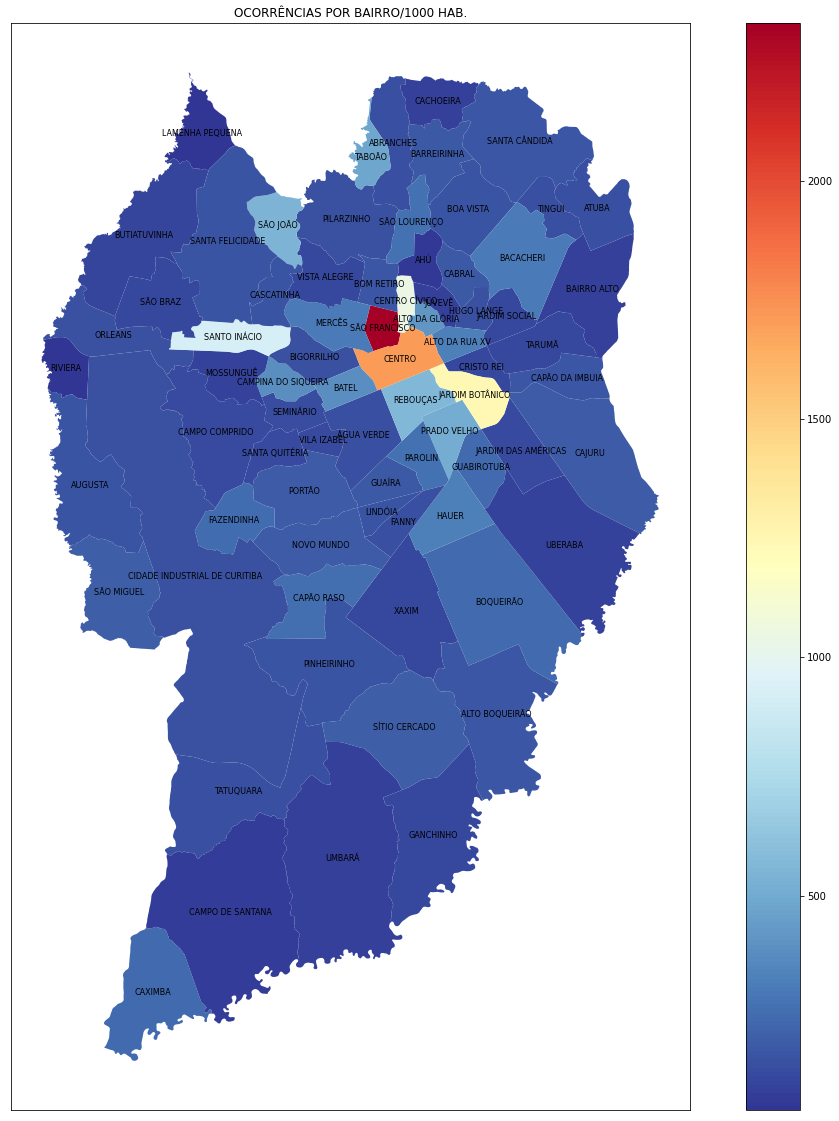

In [ ]:
grafico_com_geopandas(
    data_frame = df_curitiba_bairros,
    coluna_plotar = 'OCORR_NORM',
    x_figure_dim = 20,
    y_figure_dim = 20,
    titulo = 'OCORRÊNCIAS POR BAIRRO/1000 HAB.',
    nome_arquivo_salvar = 'mapa_curitiba2.png'
)

Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry', 'OCORRENCIAS'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry', 'OCORRENCIAS'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry', 'OCORRENCIAS'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry', 'OCORRENCIAS'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry', 'OCORRENCIAS'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry', 'OCORRENCIAS'],
      dtype='object')
Inde

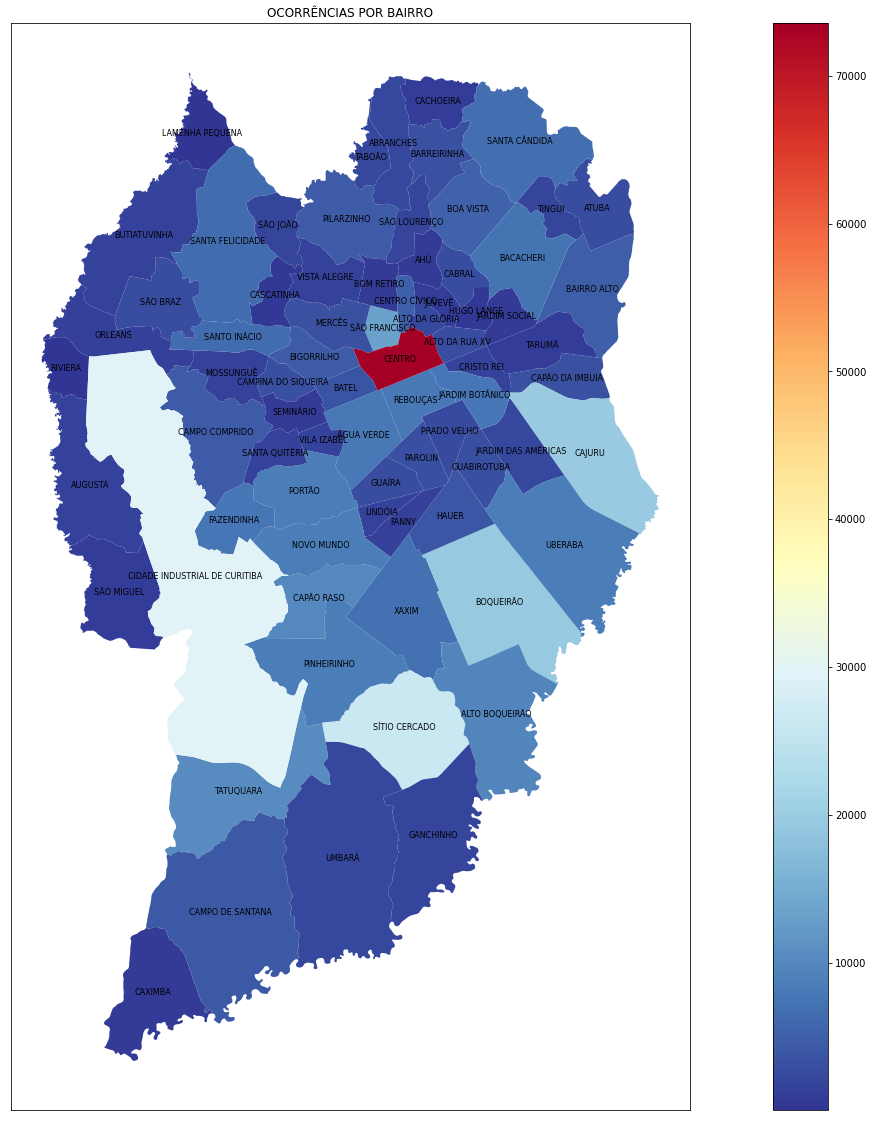

In [ ]:
grafico_com_geopandas(
    data_frame = df_curitiba_bairros,
    coluna_plotar = 'OCORRENCIAS',
    x_figure_dim = 30,
    y_figure_dim = 20,
    titulo = 'OCORRÊNCIAS POR BAIRRO',
    nome_arquivo_salvar = 'mapa_curitiba.png'
)

O mesmo gráfico de antes porém desconsiderando curitiba

Plotando gráfico sem o bairro CENTRO

Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry', 'OCORRENCIAS'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry', 'OCORRENCIAS'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry', 'OCORRENCIAS'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry', 'OCORRENCIAS'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry', 'OCORRENCIAS'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry', 'OCORRENCIAS'],
      dtype='object')
Inde

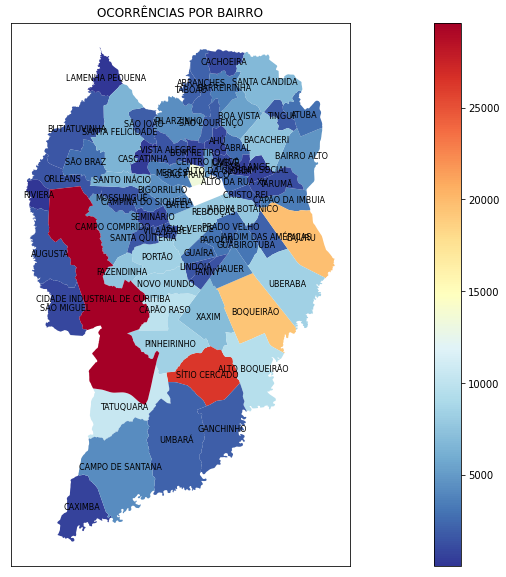

In [ ]:
grafico_com_geopandas(
    data_frame = df_curitiba_bairros[df_curitiba_bairros['NOME'] != 'CENTRO'],
    coluna_plotar = 'OCORRENCIAS',
    x_figure_dim = 30,
    y_figure_dim = 10,
    titulo = 'OCORRÊNCIAS POR BAIRRO',
    nome_arquivo_salvar = 'mapa_curitiba.png'
)

### EQUIPAMENTO_URBANO_NOME

#### VERIFICANDO VALORES DA COLUNA

Obtendo ocorrencias por equipamento urbano

In [ ]:
ocorr_por_pto_referencia = pd.DataFrame()
ocorr_por_pto_referencia['OCORRENCIAS'] = df_siges_interesse['EQUIPAMENTO_URBANO_NOME'].value_counts()
ocorr_por_pto_referencia

,OCORRENCIAS
PARQUE BARIGUI,4362
TERMINAL PINHEIRINHO,2092
TERMINAL PORTÃO,1672
ESTAÇÃO TUBO PÇ. RUI BARBOSA,1651
PARQUE TANGUÁ,1593
...,...
CÂMBIO VERDE VILA TORRES - AQUELINO,1
INSTITUTO FEDERAL DO PARANÁ,1
ESCOLA ESTADUAL PROFESSORA MARIA HELOISA CASSELLI,1
RESTAURANTE,1


Mudando o index do DataFrame de ocorrências por equipamento urbano

In [ ]:
ocorr_por_pto_referencia.reset_index(inplace = True)
ocorr_por_pto_referencia.rename({'index': 'EQUIPAMENTO_URBANO_NOME'}, axis = 1, inplace = True)
ocorr_por_pto_referencia

,EQUIPAMENTO_URBANO_NOME,OCORRENCIAS
0,PARQUE BARIGUI,4362
1,TERMINAL PINHEIRINHO,2092
2,TERMINAL PORTÃO,1672
3,ESTAÇÃO TUBO PÇ. RUI BARBOSA,1651
4,PARQUE TANGUÁ,1593
...,...,...
3771,CÂMBIO VERDE VILA TORRES - AQUELINO,1
3772,INSTITUTO FEDERAL DO PARANÁ,1
3773,ESCOLA ESTADUAL PROFESSORA MARIA HELOISA CASSELLI,1
3774,RESTAURANTE,1


Obtendo top 30 equipamentos urbanos com mais ocorrências

In [ ]:
ocorr_top30_pto_referencia = ocorr_por_pto_referencia.loc[:29]
sum(ocorr_top30_pto_referencia['OCORRENCIAS'])

36261

#### GRÁFICO DE BARRAS

Plotando gráfico de número de ocorrências por equipamento urbano em todo o período [2009 ~ 2022]
- Poucos valores com relação a todo o dataset.

C:\Users\User\AppData\Local\Temp\ipykernel_5056\1465904140.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_values, rotation = 90)
C:\Users\User\AppData\Local\Temp\ipykernel_5056\1465904140.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


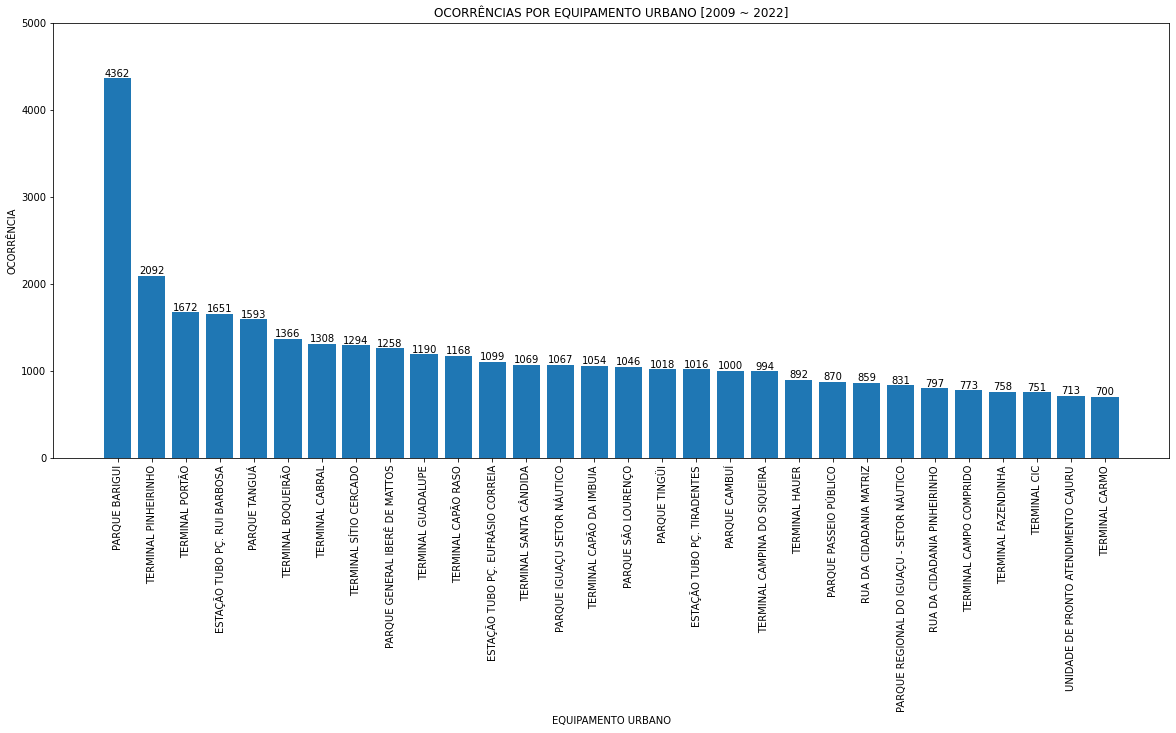

In [ ]:
grafico_histograma_label_vertical(
    x_values = ocorr_top30_pto_referencia['EQUIPAMENTO_URBANO_NOME'],
    y_values = ocorr_top30_pto_referencia['OCORRENCIAS'],
    y_lim_bottom = 0,
    y_lim_top = 5000,
    x_label = 'EQUIPAMENTO URBANO',
    y_label = 'OCORRÊNCIA',
    titulo = 'OCORRÊNCIAS POR EQUIPAMENTO URBANO [2009 ~ 2022]',
    x_figure_dim = 20,
    y_figure_dim = 8,
    flag_anotacao = True
)

### NATUREZA1_DESCRICAO

#### OCORRÊNCIAS POR NATUREZA [2009 ~ 2022]

Obtendo ocorrencias por natureza

In [ ]:
ocorr_por_natureza1 = pd.DataFrame()
ocorr_por_natureza1['OCORRENCIAS'] = df_siges_interesse['NATUREZA1_DESCRICAO'].value_counts()
ocorr_por_natureza1

,OCORRENCIAS
APOIO,69920
FUNDADA SUSPEITA (ABORDAGEM),43426
DANO,37826
TRÂNSITO,34628
ORIENTAÇÃO,26465
...,...
LIBERAÇÃO DE PESSOA PRESA/APREENDIDA POR RECUSA NO RECEBIMENTO PELA DP,1
QUADRILHA OU BANDO,1
ROMPIMENTO DE BARRAGEM,1
RUFIANISMO,1


Mudando o index do DataFrame

In [ ]:
ocorr_por_natureza1.reset_index(inplace = True)
ocorr_por_natureza1.rename({'index': 'NATUREZA'}, axis = 1, inplace = True)
ocorr_por_natureza1

,NATUREZA,OCORRENCIAS
0,APOIO,69920
1,FUNDADA SUSPEITA (ABORDAGEM),43426
2,DANO,37826
3,TRÂNSITO,34628
4,ORIENTAÇÃO,26465
...,...,...
183,LIBERAÇÃO DE PESSOA PRESA/APREENDIDA POR RECUS...,1
184,QUADRILHA OU BANDO,1
185,ROMPIMENTO DE BARRAGEM,1
186,RUFIANISMO,1


In [ ]:
printa_valores_coluna(ocorr_por_natureza1, 'NATUREZA')
printa_valores_coluna(ocorr_por_natureza1, 'OCORRENCIAS')

APOIO
FUNDADA SUSPEITA (ABORDAGEM)
DANO
TRÂNSITO
ORIENTAÇÃO
PERTURBAÇÃO DO SOSSEGO
SUBSTÂNCIA ILÍCITA
ROUBO
INVASÃO
ANIMAIS
ATITUDE SUSPEITA
ALARMES
FURTO
AMEAÇA
AGRESSÃO FÍSICA/VERBAL
VIAS DE FATO
QUEIMA A CÉU ABERTO
VIOLAÇÃO DE MEDIDA PROTETIVA LEI MARIA DA PENHA
DESINTELIGÊNCIA
VISTORIA
ESCOLTA
VEÍCULO
TENTATIVA
RISCO DE ACIDENTE / À VIDA
PACIENTE/USUÁRIO ALTERADO
ENCAMINHAMENTO
ALAGAMENTO
PATRULHA MARIA DA PENHA
FORNECIMENTO DE LONA
RONDA
ATOS OBSCENOS/LIBIDINOSOS
ZELADORIA URBANA
DESACATO
DESTELHAMENTO
DISPARO DE ARMA
AVERIGUAÇÃO
SATURAÇÃO
LESÃO CORPORAL
ACHADO
PESCA EM LOCAL PROIBIDO
QUEDA DE ÁRVORE
OBSTRUÇÃO DE VIA
AIFU
PORTE ILEGAL
USO INDEVIDO DO CARTÃO TRANSPORTE
DEPÓSITO IRREGULAR
CONDUTA INCONVENIENTE
BANHO EM LOCAL IMPRÓPRIO
IMPORTUNAÇÃO SEXUAL
RISCO DE DESABAMENTO / DESMORONAMENTO
MANIFESTAÇÃO
CRIANÇA PERDIDA/DESAPARECIDA
INCÊNDIO
DESABAMENTO
CRIME AMBIENTAL
DESAPARECIMENTO
CORTE IRREGULAR DE ÁRVORE
SUBSTÂNCIA LÍCITA
EROSÃO
SITUAÇÃO DE RISCO
DESOBEDIÊNCIA
EMBRIAGUEZ
ARRAS

Obtendo top30 naturezas com mais ocorrências

In [ ]:
top30_ocorr_por_natureza1 = ocorr_por_natureza1.loc[:29, :]
top30_ocorr_por_natureza1

,NATUREZA,OCORRENCIAS
0,APOIO,69920
1,FUNDADA SUSPEITA (ABORDAGEM),43426
2,DANO,37826
3,TRÂNSITO,34628
4,ORIENTAÇÃO,26465
5,PERTURBAÇÃO DO SOSSEGO,21566
6,SUBSTÂNCIA ILÍCITA,20922
7,ROUBO,18465
8,INVASÃO,15292
9,ANIMAIS,13650


PLOTANDO GRÁFICO

C:\Users\User\AppData\Local\Temp\ipykernel_5056\1465904140.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_values, rotation = 90)
C:\Users\User\AppData\Local\Temp\ipykernel_5056\1465904140.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


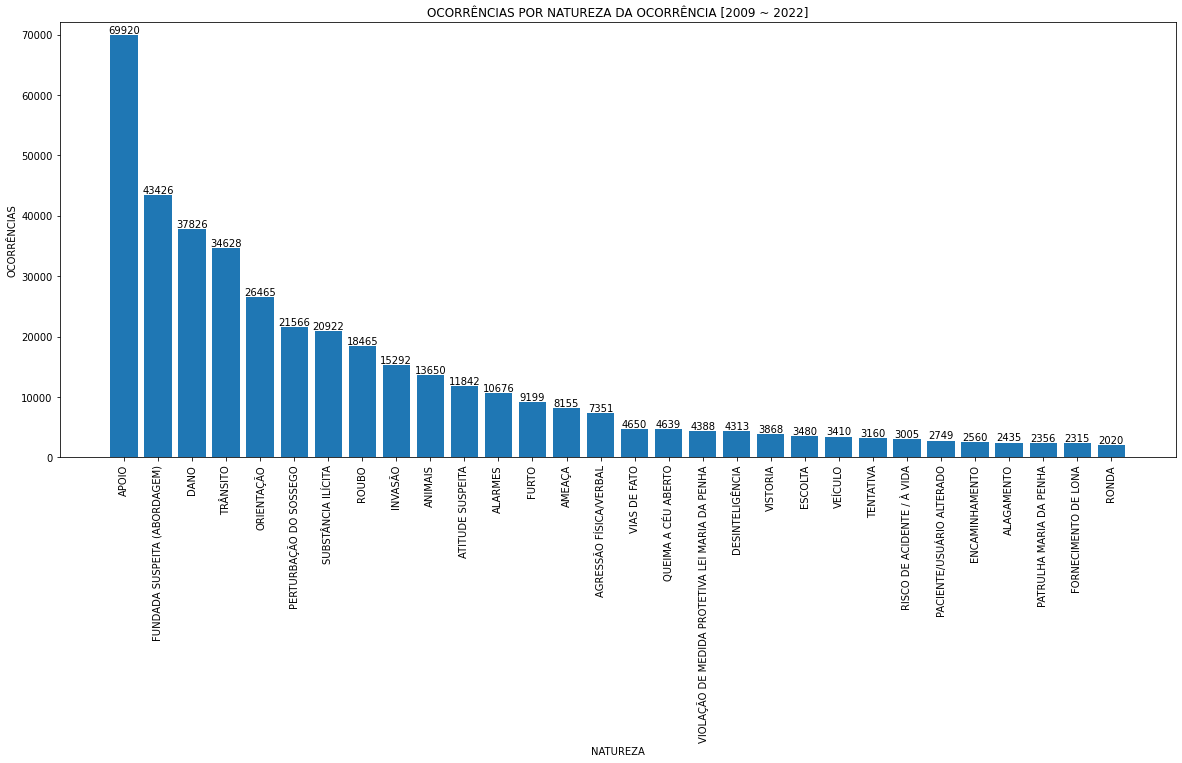

In [ ]:
grafico_histograma_label_vertical(
    x_values = top30_ocorr_por_natureza1['NATUREZA'],
    y_values = top30_ocorr_por_natureza1['OCORRENCIAS'],
    y_lim_bottom = 0,
    y_lim_top = 72000,
    x_label = 'NATUREZA',
    y_label = 'OCORRÊNCIAS',
    titulo = 'OCORRÊNCIAS POR NATUREZA DA OCORRÊNCIA [2009 ~ 2022]',
    x_figure_dim = 20,
    y_figure_dim = 8,
    flag_anotacao = True
)

#### OCORRENCIAS DE CRIMES ESPECÍFICOS

Verificando valores da coluna NATUREZA1_DESCRICAO

In [ ]:
df_siges_interesse['NATUREZA1_DESCRICAO'].unique()

array(['ALARMES', 'ROUBO', 'ANIMAIS', 'TRÂNSITO', 'INVASÃO', 'APOIO',
       'FUNDADA SUSPEITA (ABORDAGEM)', 'SUBSTÂNCIA ILÍCITA',
       'ATITUDE SUSPEITA', 'QUEDA DE ÁRVORE', 'ALAGAMENTO', 'DANO',
       'VEÍCULO', 'DESINTELIGÊNCIA', 'RIXA', 'AVERIGUAÇÃO',
       'USO INDEVIDO DO CARTÃO TRANSPORTE', 'ORIENTAÇÃO', 'FURTO',
       'DESABAMENTO', 'RISCO DE ACIDENTE/À VIDA (DEFESA CIVIL)',
       'BUEIRO ENTUPIDO', 'PERTURBAÇÃO DO SOSSEGO', 'EROSÃO', 'AMEAÇA',
       'RISCO DE DESABAMENTO / DESMORONAMENTO', 'AGRESSÃO FÍSICA/VERBAL',
       'PESCA EM LOCAL PROIBIDO', 'DESACATO', 'VIAS DE FATO',
       'PORTE ILEGAL', 'RISCO DE ACIDENTE / À VIDA', 'DEPÓSITO IRREGULAR',
       'ATAQUE DE INSETOS', 'PROTEÇÃO AO PATRIMÔNIO', 'DESTELHAMENTO',
       'EXTORSÃO', 'QUEIMA A CÉU ABERTO',
       'ESCRITO OU OBJETO OBSCENO (PANFLETOS PORNOGRÁFICOS)',
       'DISPARO DE ARMA', 'ACHADO', 'SUBSTÂNCIA LÍCITA',
       'ATOS OBSCENOS/LIBIDINOSOS', 'INCÊNDIO', 'ESCOLTA',
       'LESÃO CORPORAL', 'ENCAMINHA

Obtendo crimes específicos

In [51]:
df_siges_crimes_especificos = df_siges_interesse[df_siges_interesse['NATUREZA1_DESCRICAO'].isin([
        'AGRESSÃO FÍSICA/VERBAL',
        'LESÃO CORPORAL',
        'CRIME AMBIENTAL',
        'DANO',
        'ESTUPRO',
        'FURTO',
        'HOMICÍDIO',
        'ROUBO',
        'SEQÜESTRO E CÁRCERE PRIVADO',
        'SUBSTÂNCIA ILÍCITA',
        'AMEAÇA',
        'VIOLAÇÃO DE MEDIDA PROTETIVA LEI MARIA DA PENHA',
        'EXTORSÃO',
        'PORTE ILEGAL',
        'DISPARO DE ARMA',
        'FURTO',
        'INVASÃO',
        'ESTELIONATO',
        'ATENTADO VIOLENTO AO PUDOR',
        'PORTE DE ARTEFATO EXPLOSIVO',
        'ARRASTÃO',

        # 'ROUBO, FURTO, EXTRAVIO, RECUPERAÇÃO, APREENSÃO DE ARMAS DE FOGO.',
        # 'ESTELIONATO',
        # 'ENVENENAMENTO',
        # 'VIOLÊNCIA ARBITRÁRIA',
        # 'QUADRILHA OU BANDO',
        # 'MAUS TRATOS A ANIMAIS',

    ])
]
df_siges_crimes_especificos

,OCORRENCIA_ANO,OCORRENCIA_DATA,OCORRENCIA_DIA_SEMANA,OCORRENCIA_HORA,OCORRENCIA_MES,ATENDIMENTO_BAIRRO_NOME,EQUIPAMENTO_URBANO_NOME,LOGRADOURO_NOME,NATUREZA1_DESCRICAO,NATUREZA2_DESCRICAO,SUBCATEGORIA1_DESCRICAO,SUBCATEGORIA2_DESCRICAO,OPERACAO_DESCRICAO,ORIGEM_CHAMADO_DESCRICAO,SECRETARIA_NOME,SERVICO_NOME,SITUACAO_EQUIPE_DESCRICAO,OCORRENCIA_HORA_DIA
1,2009,2009-01-01 15:22:00,QUINTA,15:22:00,1,FAZENDINHA,BOSQUE DA FAZENDINHA,CARLOS KLEMTZ,ROUBO,NaN,TRANSEUNTE,NaN,NaN,153,SECRETARIA MUNICIPAL MEIO AMBIENTE,NORMAL,NaN,15
8,2009,2009-01-01 14:20:00,QUINTA,14:20:00,1,CENTRO,NaN,PRESIDENTE FARIA,ROUBO,NaN,TRANSEUNTE,NaN,NaN,IMEDIATA,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,GOE,NaN,14
9,2009,2009-01-01 18:04:00,QUINTA,18:04:00,1,BOA VISTA,CENTRO MUNICIPAL DE EDUCAÇÃO INFANTIL NOSSA SE...,SANTA EDWIGES,INVASÃO,NaN,INVASÃO DE EQUIPAMENTO/PATRIMÔNIO PÚBLICO,NaN,NaN,156,SECRETARIA MUNICIPAL DA EDUCAÇÃO,NORMAL,NaN,18
12,2009,2009-01-01 15:55:00,QUINTA,15:55:00,1,CENTRO,NaN,TIRADENTES,SUBSTÂNCIA ILÍCITA,NaN,TRÁFICO DE DROGAS,NaN,NaN,CCO URBS,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,NORMAL,NaN,15
21,2009,2009-01-01 20:45:00,QUINTA,20:45:00,1,CIDADE INDUSTRIAL,CENTRO DE EDUCAÇÃO INTEGRAL PADRE FRANCISCO M...,JOSÉ TISSI,INVASÃO,NaN,INVASÃO DE EQUIPAMENTO/PATRIMÔNIO PÚBLICO,NaN,NaN,CIOSP (190),SECRETARIA MUNICIPAL DA EDUCAÇÃO,NORMAL,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429325,2022,2022-12-11 22:44:00,DOMINGO,22:44:00,12,BOQUEIRÃO,NaN,HIPÓLITO DA COSTA,INVASÃO,NaN,INVASÃO DE EQUIPAMENTO/PATRIMÔNIO PÚBLICO,NaN,NORMAL,156,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,NORMAL,SOLICITAÇÃO,22
429330,2022,2022-12-11 23:40:00,DOMINGO,23:40:00,12,CENTRO,NaN,TIRADENTES,ROUBO,NaN,TRANSEUNTE,NaN,NORMAL,153,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,NORMAL,SOLICITAÇÃO,23
429340,2022,2022-12-12 05:44:00,SEGUNDA,05:44:00,12,BOQUEIRÃO,UNIDADE DE PRONTO ATENDIMENTO BOQUEIRÃO,PROFA. MARIA DE ASSUMPÇÃO,AGRESSÃO FÍSICA/VERBAL,NaN,AGRESSÃO,NaN,NORMAL,153,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,NORMAL,SOLICITAÇÃO,5
429341,2022,2022-12-12 06:09:00,SEGUNDA,06:09:00,12,PORTÃO,TERMINAL PORTÃO,REPÚBLICA ARGENTINA,AMEAÇA,NaN,NaN,NaN,NORMAL,153,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO,NORMAL,SOLICITAÇÃO,6


OCORRENCIAS CRIMES ESPECÍFICOS (OCORRÊNCIAS CRIMINOSAS) HORA DO DIA

In [50]:
df_siges_crimes_especificos['OCORRENCIA_HORA_DIA'].value_counts()

OCORRENCIA_HORA_DIA
16    8188
19    8107
20    7862
17    7774
22    7733
21    7709
15    7702
14    6812
23    6740
18    6003
11    5387
13    5363
12    4993
10    4920
9     4358
0     4155
8     3826
1     3100
7     3045
5     2818
2     2678
6     2325
3     2259
4     2011
Name: count, dtype: int64

##### TENTATIVA DE GRÁFICO COM GEOPANDAS

Carregando o dataframe geográfico com geopandas

In [ ]:
# Carrega o shapefile com os bairros de Curitiba
df_curitiba_bairros: pd.DataFrame = gpd.read_file('.\\DIVISA DE BAIRROS\\DIVISA_DE_BAIRROS.shx')
df_curitiba_bairros.columns

Index(['OBJECTID', 'CODIGO', 'TIPO', 'NOME', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry'],
      dtype='object')

Obtendo dataframe com bairros que possuem representação

In [ ]:
bairros_com_representacao = df_curitiba_bairros['NOME'].values
df_bairros_repres_crimes_espec = df_siges_crimes_especificos[df_siges_crimes_especificos['ATENDIMENTO_BAIRRO_NOME'].isin(bairros_com_representacao)]

sum(df_bairros_repres_crimes_espec['ATENDIMENTO_BAIRRO_NOME'].value_counts())

125802

Obtendo ocorrências dos crimes específicos para os bairros com representação

In [ ]:
ocorr_bairro_com_repres_crimes_espec = pd.DataFrame()
ocorr_bairro_com_repres_crimes_espec['OCORRENCIAS'] = df_bairros_repres_crimes_espec['ATENDIMENTO_BAIRRO_NOME'].value_counts()
ocorr_bairro_com_repres_crimes_espec

,OCORRENCIAS
CENTRO,22722
CIDADE INDUSTRIAL DE CURITIBA,8559
SÍTIO CERCADO,8300
CAJURU,5916
BOQUEIRÃO,5134
...,...
HUGO LANGE,133
JARDIM SOCIAL,116
CASCATINHA,48
LAMENHA PEQUENA,13


Incluindo ocorrências dos crimes específicos no dataframe geográfico

In [ ]:
df_curitiba_bairros = df_curitiba_bairros.set_index('NOME')

# Cria um dicionário mapeando os valores de index de df_curitiba_bairros com os valores correspondentes da coluna 'OCORRENCIAS' de ocorr_bairro_com_representacao
dict_remap = dict(zip(ocorr_bairro_com_repres_crimes_espec.index, ocorr_bairro_com_repres_crimes_espec['OCORRENCIAS']))

# Utiliza o método map() para alinhar os valores da coluna 'OCORRENCIAS' de df_alinhar com o índice do DataFrame de referência
df_curitiba_bairros['OCORRENCIAS_CRIMES_ESPECIFICOS'] = df_curitiba_bairros.index.map(dict_remap)

# Volta com o índice ao normal
df_curitiba_bairros = df_curitiba_bairros.reset_index()
df_curitiba_bairros

,NOME,OBJECTID,CODIGO,TIPO,FONTE,CD_REGIONA,NM_REGIONA,SHAPE_AREA,SHAPE_LEN,geometry,OCORRENCIAS_CRIMES_ESPECIFICOS
0,ÁGUA VERDE,20,9.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,7.0,REGIONAL PORTÃO,4.773046e+06,9760.918367,"POLYGON ((673879.287 7183803.691, 673907.541 7...",2606
1,JARDIM SOCIAL,22,18.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,1.0,REGIONAL MATRIZ,1.958422e+06,6055.953058,"POLYGON ((678071.018 7187798.489, 678071.550 7...",116
2,XAXIM,23,57.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,2.0,REGIONAL BOQUEIRÃO,9.085391e+06,13783.592828,"POLYGON ((674448.852 7179898.885, 674532.900 7...",2266
3,JARDIM DAS AMÉRICAS,5,22.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,3.0,REGIONAL CAJURU,3.859034e+06,8818.503767,"POLYGON ((678209.542 7181641.525, 678107.870 7...",476
4,GUAÍRA,9,26.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,7.0,REGIONAL PORTÃO,2.311397e+06,6351.958996,"POLYGON ((672709.614 7181167.829, 672599.420 7...",955
...,...,...,...,...,...,...,...,...,...,...,...
70,VISTA ALEGRE,69,31.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,5.0,REGIONAL SANTA FELICIDADE,3.698848e+06,10150.085813,"POLYGON ((670685.577 7190127.767, 670738.147 7...",352
71,SÃO BRAZ,70,60.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,5.0,REGIONAL SANTA FELICIDADE,5.060315e+06,11698.605208,"POLYGON ((666526.702 7189297.194, 666532.818 7...",595
72,SÃO JOÃO,71,48.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,5.0,REGIONAL SANTA FELICIDADE,3.036122e+06,8110.401859,"POLYGON ((670541.326 7191452.778, 670581.372 7...",320
73,CASCATINHA,74,47.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,5.0,REGIONAL SANTA FELICIDADE,2.182142e+06,8730.820987,"POLYGON ((670467.226 7189102.620, 670469.130 7...",48


Plotando o gráfico

Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'OCORRENCIAS_CRIMES_ESPECIFICOS'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'OCORRENCIAS_CRIMES_ESPECIFICOS'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'OCORRENCIAS_CRIMES_ESPECIFICOS'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'OCORRENCIAS_CRIMES_ESPECIFICOS'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'OCORRENCIAS_CRIMES_ESPECIFICOS'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TI

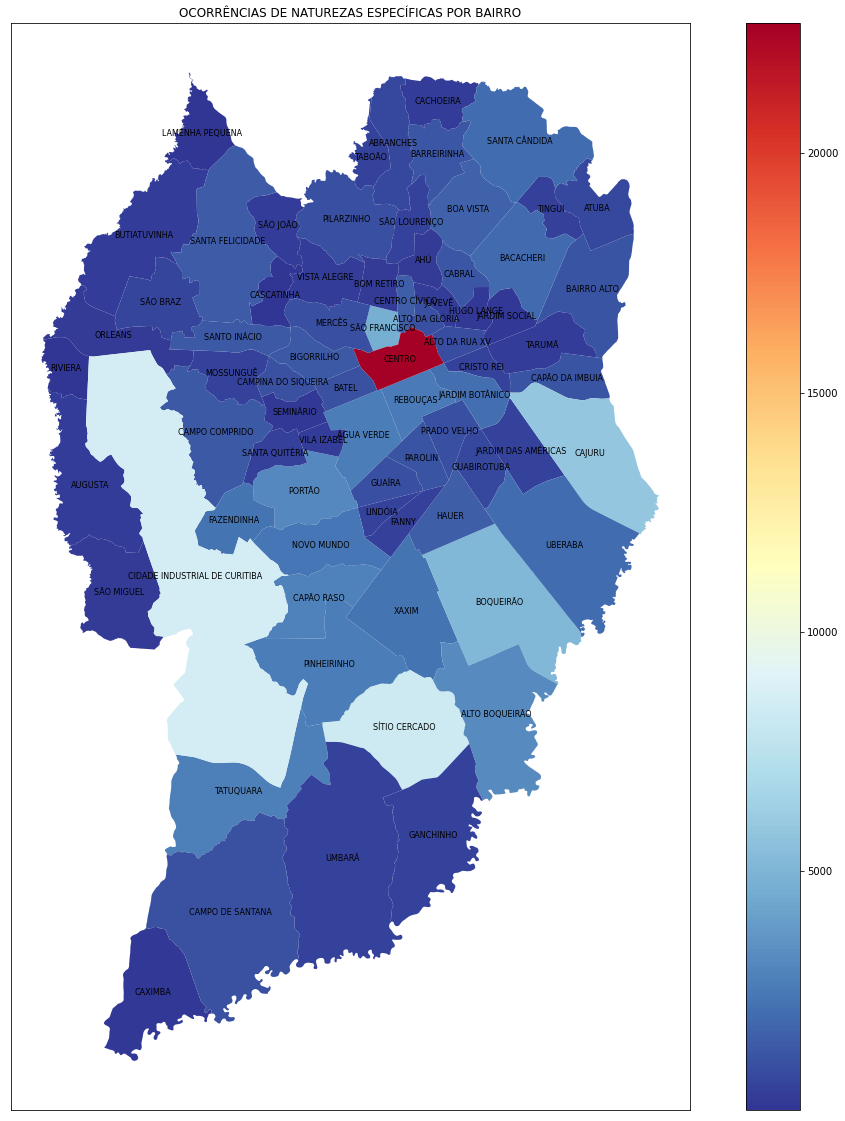

In [ ]:
grafico_com_geopandas(
    data_frame = df_curitiba_bairros,
    coluna_plotar = 'OCORRENCIAS_CRIMES_ESPECIFICOS',
    x_figure_dim = 20,
    y_figure_dim = 20,
    titulo = 'OCORRÊNCIAS DE NATUREZAS ESPECÍFICAS POR BAIRRO',
    nome_arquivo_salvar = 'mapa_curitiba_crimes_especificos.png'
)

Plota o gráfico sem o bairro Centro

Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'OCORRENCIAS_CRIMES_ESPECIFICOS'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'OCORRENCIAS_CRIMES_ESPECIFICOS'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'OCORRENCIAS_CRIMES_ESPECIFICOS'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'OCORRENCIAS_CRIMES_ESPECIFICOS'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'OCORRENCIAS_CRIMES_ESPECIFICOS'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TI

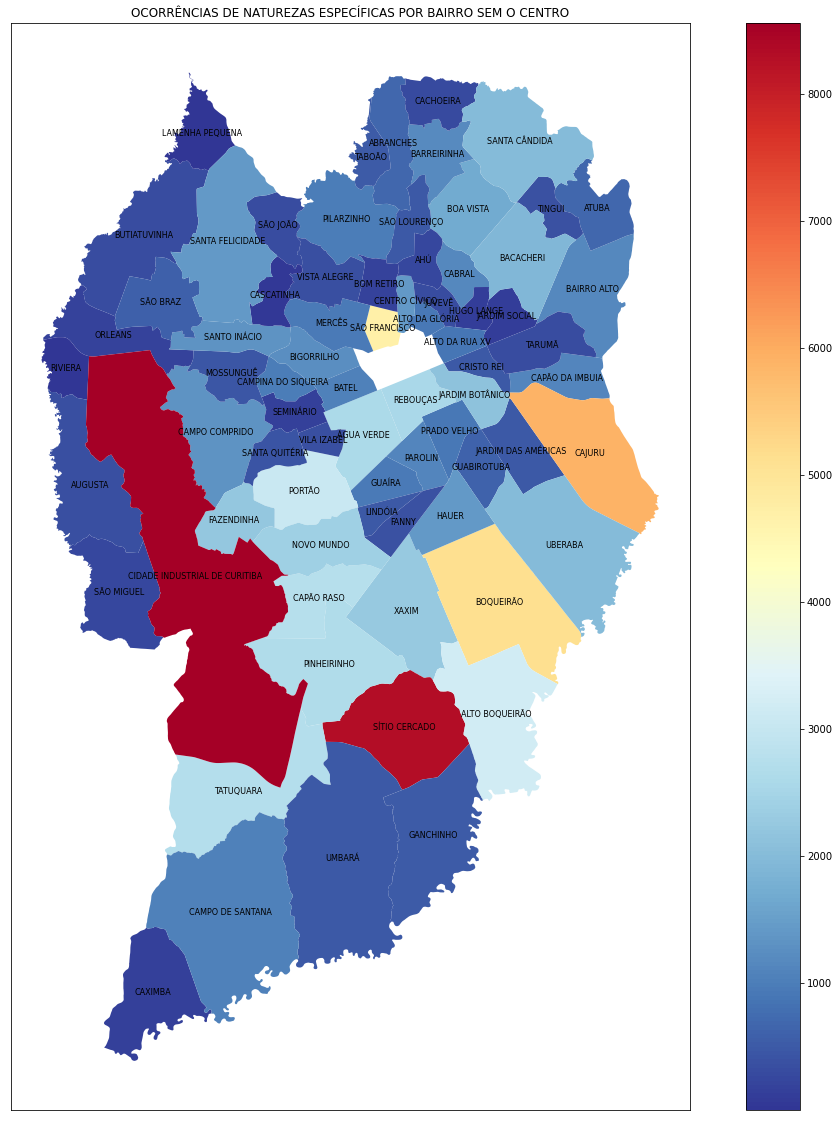

In [ ]:
grafico_com_geopandas(
    data_frame = df_curitiba_bairros[df_curitiba_bairros['NOME'] != 'CENTRO'],
    coluna_plotar = 'OCORRENCIAS_CRIMES_ESPECIFICOS',
    x_figure_dim = 20,
    y_figure_dim = 20,
    titulo = 'OCORRÊNCIAS DE NATUREZAS ESPECÍFICAS POR BAIRRO SEM O CENTRO',
    nome_arquivo_salvar = 'mapa_curitiba_crimes_especificos_sem_centro.png'
)


#### OCORRENCIAS DO CRIME 'DANO'

Carregando o dataframe geográfico com geopandas

In [ ]:
df_siges_crimes_especificos['NATUREZA1_DESCRICAO'].value_counts()

DANO                                               37826
SUBSTÂNCIA ILÍCITA                                 20922
ROUBO                                              18465
INVASÃO                                            15292
FURTO                                               9199
AMEAÇA                                              8155
AGRESSÃO FÍSICA/VERBAL                              7351
VIOLAÇÃO DE MEDIDA PROTETIVA LEI MARIA DA PENHA     4388
DISPARO DE ARMA                                     1433
LESÃO CORPORAL                                      1013
PORTE ILEGAL                                         639
CRIME AMBIENTAL                                      414
ARRASTÃO                                             247
ESTELIONATO                                          145
HOMICÍDIO                                            102
ESTUPRO                                               92
SEQÜESTRO E CÁRCERE PRIVADO                           76
EXTORSÃO                       

In [ ]:
# Carrega o shapefile com os bairros de Curitiba
df_curitiba_bairros: pd.DataFrame = gpd.read_file('.\\DIVISA DE BAIRROS\\DIVISA_DE_BAIRROS.shx')
df_curitiba_bairros.columns

Index(['OBJECTID', 'CODIGO', 'TIPO', 'NOME', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry'],
      dtype='object')

Obtendo dataframe com bairros que possuem representação

In [ ]:
bairros_com_representacao = df_curitiba_bairros['NOME'].values
df_bairros_repres_crime_dano = df_siges_crimes_especificos[df_siges_crimes_especificos['ATENDIMENTO_BAIRRO_NOME'].isin(bairros_com_representacao)]

sum(df_bairros_repres_crimes_espec['ATENDIMENTO_BAIRRO_NOME'].value_counts())

125802

Obtendo ocorrências dos crimes específicos para os bairros com representação

In [ ]:
ocorr_bairro_com_repres_crime_dano = pd.DataFrame()
ocorr_bairro_com_repres_crime_dano['OCORRENCIAS'] = df_bairros_repres_crime_dano[df_bairros_repres_crime_dano['NATUREZA1_DESCRICAO'] == 'DANO']['ATENDIMENTO_BAIRRO_NOME'].value_counts() 
ocorr_bairro_com_repres_crime_dano

,OCORRENCIAS
CENTRO,4916
CIDADE INDUSTRIAL DE CURITIBA,2868
SÍTIO CERCADO,2420
CAJURU,1898
BOQUEIRÃO,1497
...,...
ORLEANS,53
CAXIMBA,46
JARDIM SOCIAL,35
CASCATINHA,17


Incluindo ocorrências dos crimes específicos no dataframe geográfico

In [ ]:
df_curitiba_bairros = df_curitiba_bairros.set_index('NOME')

# Cria um dicionário mapeando os valores de index de df_curitiba_bairros com os valores correspondentes da coluna 'OCORRENCIAS' de ocorr_bairro_com_representacao
dict_remap = dict(zip(ocorr_bairro_com_repres_crime_dano.index, ocorr_bairro_com_repres_crime_dano['OCORRENCIAS']))

# Utiliza o método map() para alinhar os valores da coluna 'OCORRENCIAS' de df_alinhar com o índice do DataFrame de referência
df_curitiba_bairros['OCORRENCIAS_CRIME_DANO'] = df_curitiba_bairros.index.map(dict_remap)

# Volta com o índice ao normal
df_curitiba_bairros = df_curitiba_bairros.reset_index()
df_curitiba_bairros

,NOME,OBJECTID,CODIGO,TIPO,FONTE,CD_REGIONA,NM_REGIONA,SHAPE_AREA,SHAPE_LEN,geometry,OCORRENCIAS_CRIME_DANO
0,ÁGUA VERDE,20,9.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,7.0,REGIONAL PORTÃO,4.773046e+06,9760.918367,"POLYGON ((673879.287 7183803.691, 673907.541 7...",876.0
1,JARDIM SOCIAL,22,18.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,1.0,REGIONAL MATRIZ,1.958422e+06,6055.953058,"POLYGON ((678071.018 7187798.489, 678071.550 7...",35.0
2,XAXIM,23,57.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,2.0,REGIONAL BOQUEIRÃO,9.085391e+06,13783.592828,"POLYGON ((674448.852 7179898.885, 674532.900 7...",603.0
3,JARDIM DAS AMÉRICAS,5,22.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,3.0,REGIONAL CAJURU,3.859034e+06,8818.503767,"POLYGON ((678209.542 7181641.525, 678107.870 7...",165.0
4,GUAÍRA,9,26.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,7.0,REGIONAL PORTÃO,2.311397e+06,6351.958996,"POLYGON ((672709.614 7181167.829, 672599.420 7...",241.0
...,...,...,...,...,...,...,...,...,...,...,...
70,VISTA ALEGRE,69,31.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,5.0,REGIONAL SANTA FELICIDADE,3.698848e+06,10150.085813,"POLYGON ((670685.577 7190127.767, 670738.147 7...",124.0
71,SÃO BRAZ,70,60.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,5.0,REGIONAL SANTA FELICIDADE,5.060315e+06,11698.605208,"POLYGON ((666526.702 7189297.194, 666532.818 7...",219.0
72,SÃO JOÃO,71,48.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,5.0,REGIONAL SANTA FELICIDADE,3.036122e+06,8110.401859,"POLYGON ((670541.326 7191452.778, 670581.372 7...",93.0
73,CASCATINHA,74,47.0,DIVISA DE BAIRROS,Decreto Municipal 774 / 1975,5.0,REGIONAL SANTA FELICIDADE,2.182142e+06,8730.820987,"POLYGON ((670467.226 7189102.620, 670469.130 7...",17.0


Plotando o gráfico

Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'OCORRENCIAS_CRIME_DANO'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'OCORRENCIAS_CRIME_DANO'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'OCORRENCIAS_CRIME_DANO'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'OCORRENCIAS_CRIME_DANO'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'OCORRENCIAS_CRIME_DANO'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_R

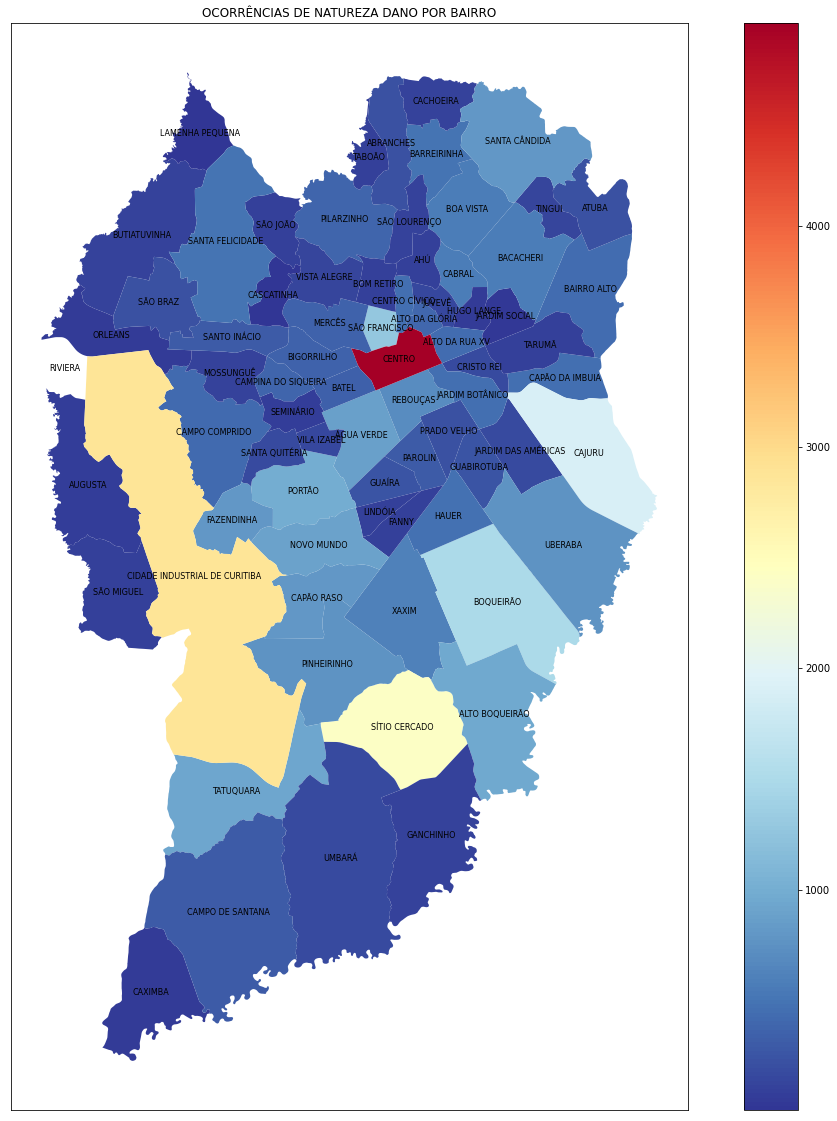

In [ ]:
grafico_com_geopandas(
    data_frame = df_curitiba_bairros,
    coluna_plotar = 'OCORRENCIAS_CRIME_DANO',
    x_figure_dim = 20,
    y_figure_dim = 20,
    titulo = 'OCORRÊNCIAS DE NATUREZA DANO POR BAIRRO',
    nome_arquivo_salvar = 'mapa_curitiba_crimes_especificos_dano.png'
)

Plota o mesmo gráfico sem o bairro CENTRO

Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'OCORRENCIAS_CRIME_DANO'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'OCORRENCIAS_CRIME_DANO'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'OCORRENCIAS_CRIME_DANO'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'OCORRENCIAS_CRIME_DANO'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_REGIONA', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry',
       'OCORRENCIAS_CRIME_DANO'],
      dtype='object')
Index(['NOME', 'OBJECTID', 'CODIGO', 'TIPO', 'FONTE', 'CD_REGIONA',
       'NM_R

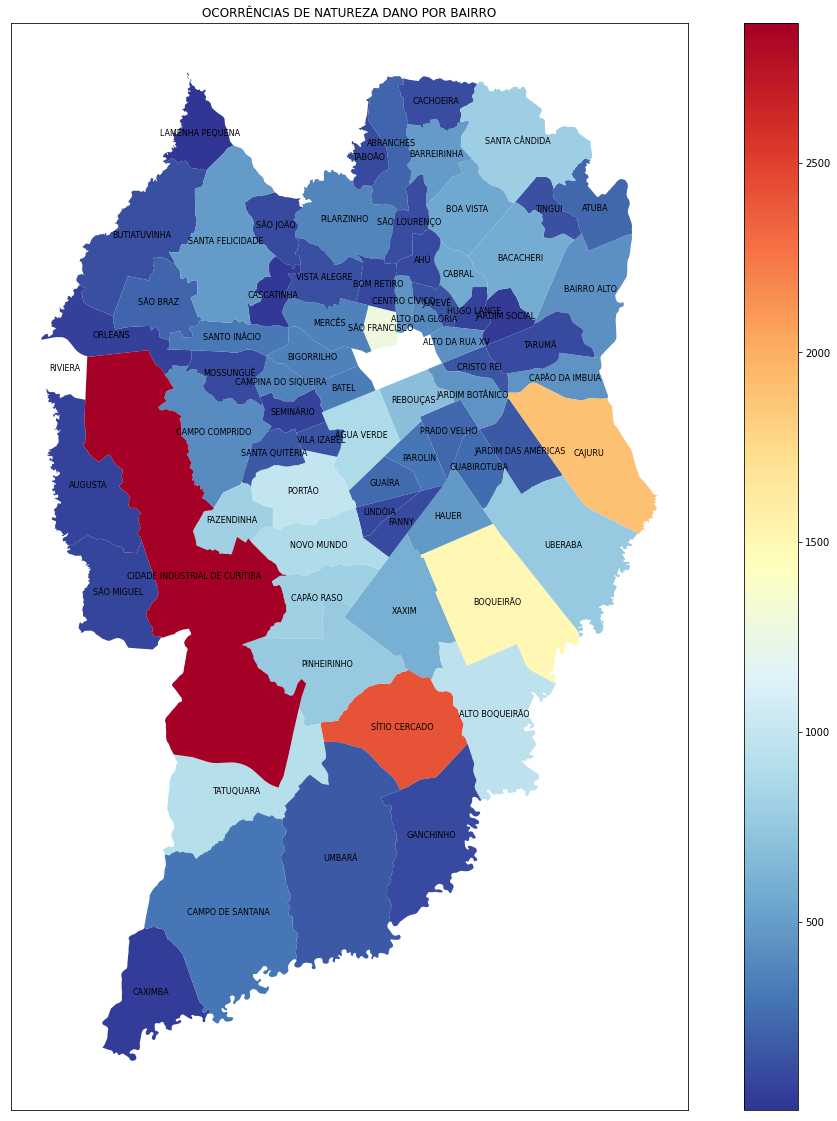

In [ ]:
grafico_com_geopandas(
    data_frame = df_curitiba_bairros[df_curitiba_bairros['NOME'] != 'CENTRO'],
    coluna_plotar = 'OCORRENCIAS_CRIME_DANO',
    x_figure_dim = 20,
    y_figure_dim = 20,
    titulo = 'OCORRÊNCIAS DE NATUREZA DANO POR BAIRRO',
    nome_arquivo_salvar = 'mapa_curitiba_crimes_especificos_dano_sem_centro.png'
)

### NATUREZA2_DESCRICAO

##### VERIFICANDO VALORES DA COLUNA
- Poucas ocorrências, não prolonguei a análise

In [ ]:
ocorr_por_natureza2 = pd.DataFrame()
ocorr_por_natureza2['OCORRENCIAS'] = df_siges_interesse['NATUREZA2_DESCRICAO'].value_counts()
sum(ocorr_por_natureza2['OCORRENCIAS'])

22174

### SUBCATEGORIA1_DESCRICAO

##### VERIFICANDO VALORES DA COLUNA

Obtendo ocorrências por subcategoria1

In [ ]:
ocorr_por_subcategoria1 = pd.DataFrame()
ocorr_por_subcategoria1['OCORRENCIAS'] = df_siges_interesse['SUBCATEGORIA1_DESCRICAO'].value_counts()
ocorr_por_subcategoria1.reset_index(inplace = True)
ocorr_por_subcategoria1.rename({'index':'SUBCATEGORIA1_DESCRICAO'}, axis = 1, inplace = True)
ocorr_por_subcategoria1

,SUBCATEGORIA1_DESCRICAO,OCORRENCIAS
0,ABORDAGEM A PESSOA,16891
1,APOIO AO CIDADÃO - PRESTAÇÃO DE SOCORRO/SALVAM...,15695
2,USO DE SUBSTÂNCIA ILÍCITA,14238
3,ESTACIONAMENTO IRREGULAR,12447
4,ORIENTAÇÃO COVID-19,11902
...,...,...
210,NÃO SINALIZAR MUDANÇA DE DIREÇÃO,1
211,GAZUAS/CHAVES FALSAS,1
212,CENTRO DE ZOONOZES,1
213,VIGILÂNCIA SANITÁRIA,1


Obtendo top30 subcategorias com mais ocorrências

In [ ]:
top30_ocorr_por_subcategoria1 = ocorr_por_subcategoria1.loc[:29, :]
top30_ocorr_por_subcategoria1

,SUBCATEGORIA1_DESCRICAO,OCORRENCIAS
0,ABORDAGEM A PESSOA,16891
1,APOIO AO CIDADÃO - PRESTAÇÃO DE SOCORRO/SALVAM...,15695
2,USO DE SUBSTÂNCIA ILÍCITA,14238
3,ESTACIONAMENTO IRREGULAR,12447
4,ORIENTAÇÃO COVID-19,11902
5,VANDALISMO,10376
6,PICHAÇÃO,10166
7,DISPARO DE ALARME (VIOLAÇÃO),9773
8,TRANSEUNTE,9684
9,APOIO À OUTROS ÓRGÃOS,9289


##### PLOTANDO GRÁFICO

C:\Users\User\AppData\Local\Temp\ipykernel_5056\1465904140.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_values, rotation = 90)
C:\Users\User\AppData\Local\Temp\ipykernel_5056\1465904140.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


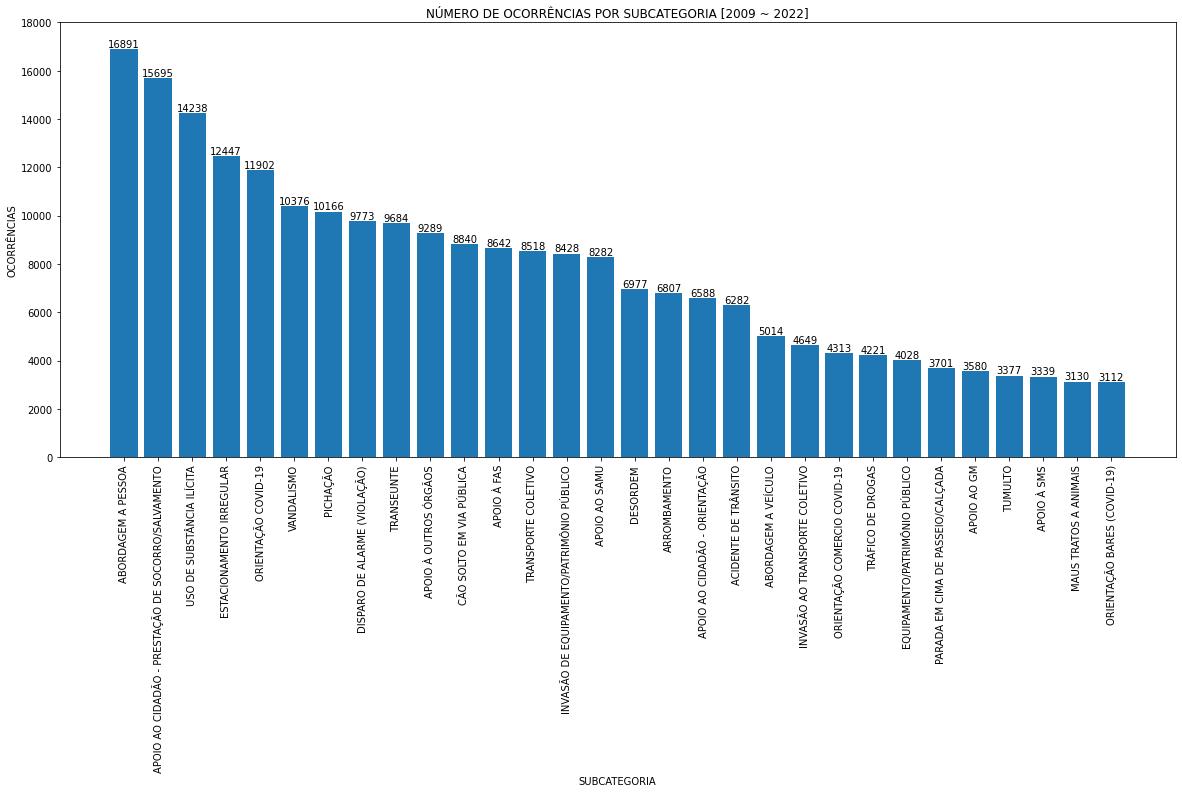

In [ ]:
grafico_histograma_label_vertical(
    x_values = top30_ocorr_por_subcategoria1['SUBCATEGORIA1_DESCRICAO'],
    y_values = top30_ocorr_por_subcategoria1['OCORRENCIAS'],
    y_lim_bottom = 0,
    y_lim_top = 18000,
    x_label = 'SUBCATEGORIA',
    y_label = 'OCORRÊNCIAS',
    titulo = 'NÚMERO DE OCORRÊNCIAS POR SUBCATEGORIA [2009 ~ 2022]',
    x_figure_dim = 20,
    y_figure_dim = 8,
    flag_anotacao = True
)

### SUBCATEGORIA2_DESCRICAO

##### VERIFICANDO VALORES DA COLUNA
- Poucas amostras, não prolonguei a análise

Obtendo ocorrências por subcategoria2

In [ ]:
ocorr_por_subcategoria2 = pd.DataFrame()
ocorr_por_subcategoria2['OCORRENCIAS'] = df_siges_interesse['SUBCATEGORIA2_DESCRICAO'].value_counts()
ocorr_por_subcategoria2 = ocorr_por_subcategoria2.reset_index()
sum(ocorr_por_subcategoria2['OCORRENCIAS'])

13688